# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [4248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

### 데이터 셋 읽어오기

In [4249]:
df_train = pd.read_csv("../data/train.csv") # 학습용 데이터
df_test = pd.read_csv("../data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [4250]:
df_train.tail() # 학습용 데이터 살펴보기

bant_submit          customer_country business_unit  \
59294         1.00           /Sląskie/Poland            AS   
59295         0.75      /Bogotá DC /Colombia            AS   
59296         0.75               /Pisco/Peru            AS   
59297         1.00  /santa cruz bolivia/Peru            AS   
59298         0.75             /paris/France      Solution   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
59294                   NaN         33747           End Customer         SMB   
59295                  0.04         35420  Specifier/ Influencer  Enterprise   
59296                  0.04         19249  Specifier/ Influencer  Enterprise   
59297                  0.04         40327                    NaN  Enterprise   
59298                   NaN         30268                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
59294                      NaN               NaN               NaN  ...   
59295                      NaN               NaN               NaN  ...   
59296                      NaN               NaN               NaN  ...   
59297                      NaN               NaN               NaN  ...   
59298                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
59294               LGEPL  3 months ~ 6 months        0       0   
59295               LGECB    9 months ~ 1 year        0       0   
59296               LGEPR   less than 3 months        0       0   
59297               LGEPR     more than a year        0       0   
59298               LGEKR   less than 3 months        0       0   

      ver_win_rate_x ver_win_ratio_per_bu    business_area business_subarea  \
59294       0.000026             0.028777  public facility           Others   
59295       0.000026             0.028777  public facility              NaN   
59296       0.000026             0.028777  public facility              NaN   
59297       0.000026             0.028777  public facility              NaN   
59298       0.000026                  NaN  public facility              NaN   

      lead_owner is_converted  
59294        694        False  
59295         39        False  
59296        125        False  
59297        134        False  
59298        441        False  

[5 rows x 29 columns]

타겟변수(is_converted)를 포함하여 29개의 칼럼으로 이루어져 있고  
59298개의 데이터를 가짐을 확인할수 있다.

In [4251]:
df_test.tail() # 테스트 데이터 살펴보기

id  bant_submit            customer_country business_unit  \
5266  13855         0.50           /São Paulo/Brazil            AS   
5267   7979         0.25  General /  / United States            IT   
5268  12887         0.75      / OURO BRANCO / Brazil            AS   
5269  17530         0.00                /  / Germany            IT   
5270   4330         0.25           / Ongole  / India            AS   

      com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
5266                   NaN         40292                    NaN  Enterprise   
5267                   NaN         47466                    NaN  Enterprise   
5268                   NaN         46227  Specifier/ Influencer  Enterprise   
5269                   NaN         45667           End Customer         SMB   
5270                   NaN         23646           End Customer  Enterprise   

      historical_existing_cnt  id_strategic_ver  ...  response_corporate  \
5266                     10.0               NaN  ...               LGESP   
5267                      0.0               NaN  ...               LGEUS   
5268                      NaN               NaN  ...               LGESP   
5269                      NaN               NaN  ...               LGEDG   
5270                      NaN               NaN  ...               LGEIL   

       expected_timeline ver_cus  ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
5266                 NaN       0        0            NaN                  NaN   
5267                 NaN       0        0            NaN                  NaN   
5268  less than 3 months       0        0            NaN                  NaN   
5269                 NaN       0        0            NaN                  NaN   
5270                 NaN       0        0            NaN                  NaN   

     business_area business_subarea lead_owner is_converted  
5266           NaN              NaN         97        False  
5267           NaN              NaN        438        False  
5268           NaN              NaN         97         True  
5269           NaN              NaN        429        False  
5270           NaN              NaN          4         True  

[5 rows x 30 columns]

테스트 데이터의 경우 id 칼럼이 추가되는것을 확인할수 있다.

훈련용 데이터에 대해서 가지고 있는 정보를 확인하면 다음과 같다.

In [4252]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

### 결측치 확인

In [4253]:
df_train.isnull().sum() / df_train.shape[0]

bant_submit                0.000000
customer_country           0.016560
business_unit              0.000000
com_reg_ver_win_rate       0.754330
customer_idx               0.000000
customer_type              0.741345
enterprise                 0.000000
historical_existing_cnt    0.768023
id_strategic_ver           0.941921
it_strategic_ver           0.981096
idit_strategic_ver         0.923017
customer_job               0.315908
lead_desc_length           0.000000
inquiry_type               0.015869
product_category           0.326717
product_subcategory        0.844264
product_modelname          0.844365
customer_country.1         0.016560
customer_position          0.000000
response_corporate         0.000000
expected_timeline          0.520464
ver_cus                    0.000000
ver_pro                    0.000000
ver_win_rate_x             0.689421
ver_win_ratio_per_bu       0.741918
business_area              0.689421
business_subarea           0.906811
lead_owner                 0

결측치를 포함하고 있는 변수들이 있음을 확인할수 있다.

### 이상치 확인

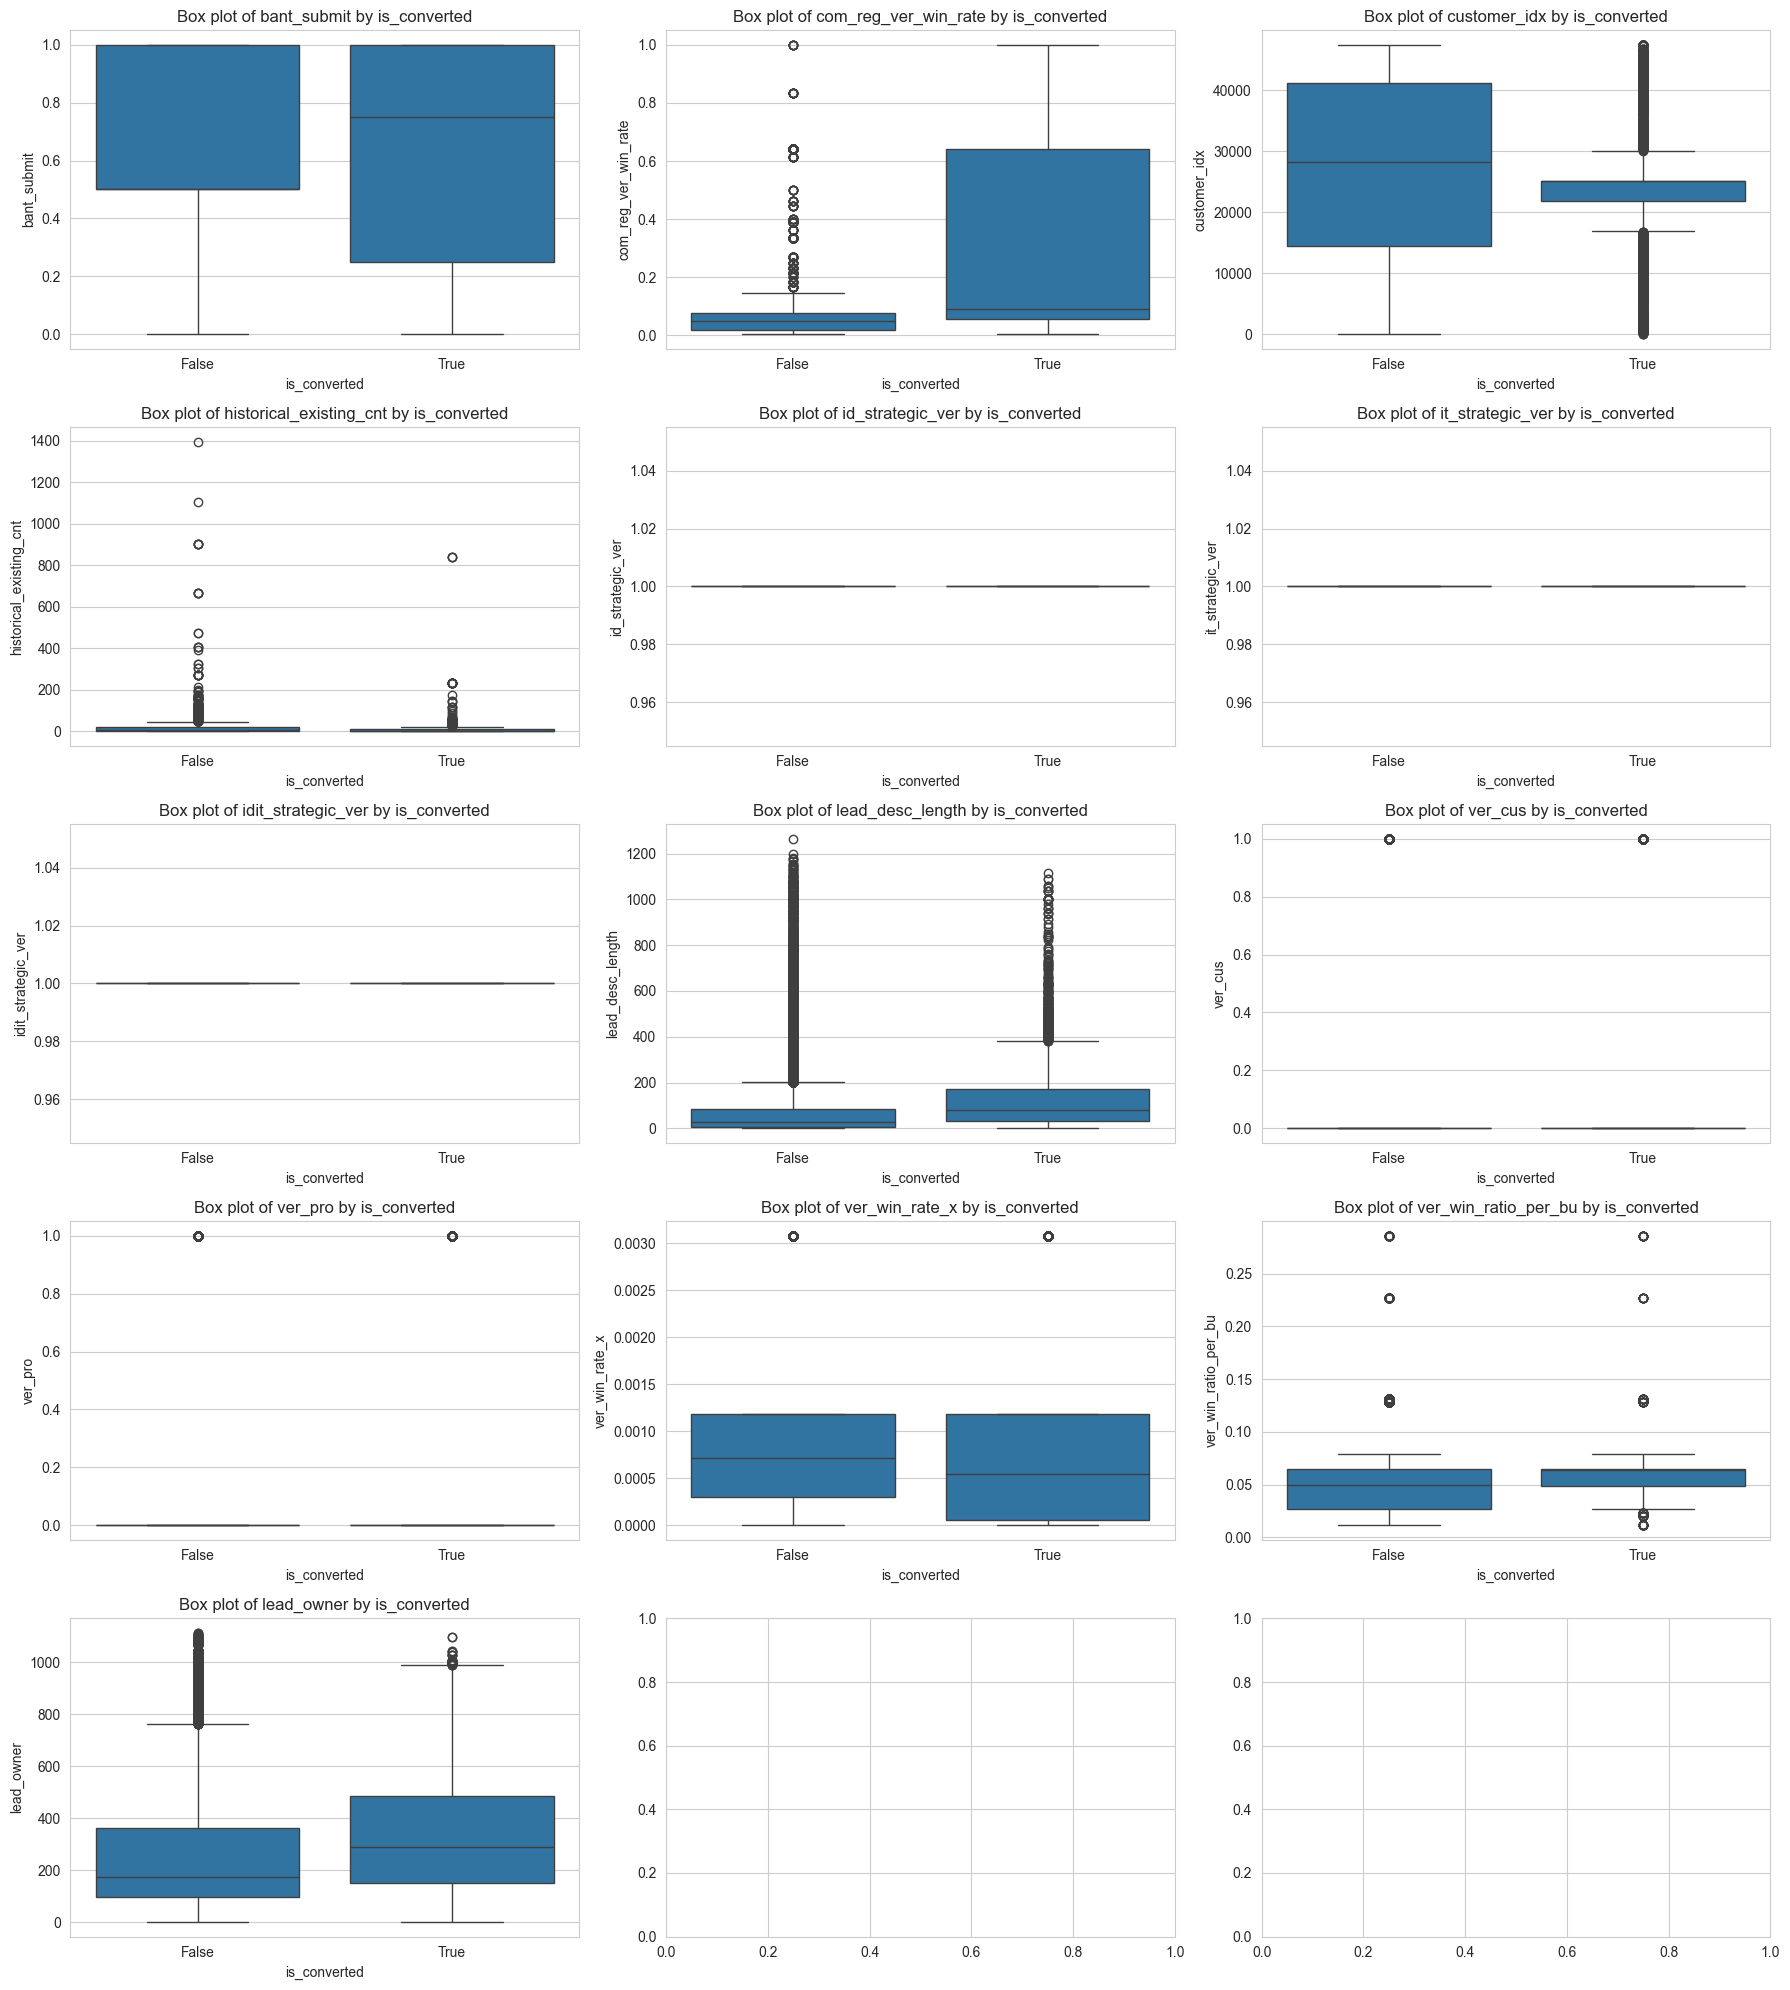

In [4254]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 변수의 개수에 따라 적절한 행과 열의 개수 설정
n = len(numeric_vars)
ncols = 3  # 열의 개수를 설정
nrows = n // ncols if n % ncols == 0 else n // ncols + 1  # 행의 개수 계산

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))

for i, var in enumerate(numeric_vars):
    r = i // ncols
    c = i % ncols
    sns.boxplot(x='is_converted', y=var, data=df_train, ax=axs[r, c])
    axs[r, c].set_title('Box plot of ' + var + ' by is_converted')

plt.tight_layout()
plt.show()


## 2. 데이터 전처리

### 각 변수별 확인

일단은 크게 처리할만한 부분만 처리하면서 진행해보았음

#### 1. bant_submit

MQL 구성 요소들 중  
[1] Budget(예산)  
[2] Title(고객의 직책/직급)  
[3] Needs(요구사항)  
[4] Timeline(희망 납기일)  
4가지 항목에 대해서 작성된 값의 비율

In [4255]:
df_train['bant_submit'].value_counts()

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64

결측지 확인

In [4256]:
print(df_train['bant_submit'].isnull().sum())

0


#### 2. customer_country

고객의 국적

In [4257]:
df_train['customer_country'].value_counts()

customer_country
//India                                                                                                                            3037
/São Paulo/Brazil                                                                                                                  1344
//United States                                                                                                                     962
//United Kingdom                                                                                                                    805
//Saudi Arabia                                                                                                                      718
//Italy                                                                                                                             707
//Philippines                                                                                                                       705
//U.A.E                        

In [4258]:
def process_customer_country_tokenized(df, column_name):
    for i, entry in enumerate(df[column_name]):
        if isinstance(entry, str):
            tokens = [token.strip() for token in entry.replace('/', ',').split(',') if token.strip() != '']
            if tokens:
                df.at[i, column_name] = tokens[-1]
            else:
                df.at[i, column_name] = np.nan
        else:
            df.at[i, column_name] = np.nan
    return df


In [4259]:
df_train = process_customer_country_tokenized(df_train, 'customer_country')
df_test = process_customer_country_tokenized(df_test, 'customer_country')

In [4260]:
# 미국 주 이름 카테고리화
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

df_train['customer_country'] = df_train['customer_country'].replace(us_states, 'United States')
df_test['customer_country'] = df_test['customer_country'].replace(us_states, 'United States')

In [4261]:
def update_country(country):

    asia = ['Australia', 'Bangladesh', 'Brunei', 'Cambodia', 'China', 'Fiji', 'Hong Kong', 'India', 'Indonesia', 'Laos', 'Malaysia', 'Maldives', 'Myanmar', 'Nepal', 'New Zealand', 'Papula New Guinea', 'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand', 'Vietnam', 'Japan', 'South Korea']
    cis = ['Belarus', 'Kazakhstan', 'Mongolia', 'Russia', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
    europe = ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Isle of Man', 'Malta']
    latin_america_and_the_caribbean = ['Anguilla', 'Antigua', 'Argentina', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia', 'COLOMBIA', 'Costa Rica', 'Cuba', 'Curacao', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Netherlands Antilles', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Saint Lucia', 'St Kitts', 'St Maarten', 'St Vincent', 'Suriname', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'US Virgin Islands', 'Venezuela', 'Antigua and Barbuda', 'Saint Kitts and Nevis']
    middle_east_and_africa = ['Afghanistan', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bahrain', 'Benin', 'Botswana', 'Burkina Faso Cameroon', 'Central African Republic', 'Congo', "Cote d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'EGYPT', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guinea Iran', 'Iraq', 'Israel', 'Ivory Coast', 'Jordan', 'Kenya', 'Kuwait', 'Lebanon', 'Liberia', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Nigeria', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Rwanda', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Swaziland', 'Syria', 'Togo', 'Tunisia', 'Türkiye', 'Turkey', 'U.A.E', 'Uganda', 'United Republic of Tanzania', 'Yemen', 'Zambia', 'Eritrea', 'Libya Malawi', 'Zimbabwe']
    north_america = ['Canada', 'United States', 'UNITED STATES']

    if country in asia:
        return country
    elif country in cis:
        return country
    elif country in europe:
        return country
    elif country in latin_america_and_the_caribbean:
        return country
    elif country in middle_east_and_africa:
        return country
    elif country in north_america:
        return country
    else:
        return 'Unknown'

df_train['customer_country'] = df_train['customer_country'].apply(update_country)
df_test['customer_country'] = df_test['customer_country'].apply(update_country)


In [4262]:
df_train['customer_country'].value_counts()

customer_country
India                               16851
Brazil                               8739
United States                        3850
Unknown                              3480
Mexico                               2753
Philippines                          2570
Colombia                             1940
U.A.E                                1630
United Kingdom                       1520
Saudi Arabia                         1470
Chile                                1227
Italy                                1148
Peru                                 1134
Germany                               896
Poland                                834
Vietnam                               600
Egypt                                 583
Spain                                 561
Argentina                             497
Hong Kong                             393
Australia                             371
Panama                                337
France                                310
Turkey           

In [4263]:
df_test['customer_country'].value_counts()

customer_country
Brazil                              1045
India                                906
United States                        777
Philippines                          289
Unknown                              227
Peru                                 211
Mexico                               180
Colombia                             127
U.A.E                                120
Italy                                120
Chile                                108
Saudi Arabia                         102
Egypt                                 95
Indonesia                             95
Vietnam                               69
Germany                               67
Australia                             66
Argentina                             65
Türkiye                               51
Hong Kong                             48
United Kingdom                        44
Poland                                42
Singapore                             41
Thailand                              38

일단은 적은갯수에 대해서 따로 잘라내는 작업은 주석처리

In [4264]:
# 'customer_country'의 빈도 계산
counts_train = df_train['customer_country'].value_counts()
counts_test = df_test['customer_country'].value_counts()

# 빈도가 특정수치 이하인 국가를 찾음
find_count_train = counts_train[counts_train <= 30].index
find_count_test = counts_test[counts_test <= 2].index

# 빈도가 특정수치 이하인 국가를 'Unknown'으로 설정
df_train.loc[df_train['customer_country'].isin(find_count_train), 'customer_country'] = 'Unknown'
df_test.loc[df_test['customer_country'].isin(find_count_test), 'customer_country'] = 'Unknown'


In [4265]:
df_train['customer_country'].value_counts()

customer_country
India                 16851
Brazil                 8739
Unknown                4369
United States          3850
Mexico                 2753
Philippines            2570
Colombia               1940
U.A.E                  1630
United Kingdom         1520
Saudi Arabia           1470
Chile                  1227
Italy                  1148
Peru                   1134
Germany                 896
Poland                  834
Vietnam                 600
Egypt                   583
Spain                   561
Argentina               497
Hong Kong               393
Australia               371
Panama                  337
France                  310
Canada                  287
Turkey                  287
Ecuador                 283
Indonesia               268
Türkiye                 256
Singapore               227
South Africa            201
Iraq                    191
Nigeria                 181
Hungary                 168
Thailand                166
Portugal                125
Ken

In [4266]:
df_test['customer_country'].value_counts()

customer_country
Brazil                1045
India                  906
United States          777
Philippines            289
Unknown                270
Peru                   211
Mexico                 180
Colombia               127
U.A.E                  120
Italy                  120
Chile                  108
Saudi Arabia           102
Indonesia               95
Egypt                   95
Vietnam                 69
Germany                 67
Australia               66
Argentina               65
Türkiye                 51
Hong Kong               48
United Kingdom          44
Poland                  42
Singapore               41
Thailand                38
Panama                  29
Serbia                  20
Greece                  19
South Africa            19
Canada                  17
France                  16
Oman                    16
Spain                   15
Ecuador                 14
UNITED STATES           13
Hungary                 13
Venezuela                8
Nigeria    

In [4267]:
print(df_train['customer_country'].isnull().sum())

0


In [4268]:
print(df_test['customer_country'].isnull().sum())

0


In [4269]:
df_train['customer_country'] = df_train['customer_country'].fillna('Unknown')
df_test['customer_country'] = df_test['customer_country'].fillna('Unknown')

In [4270]:
print(df_train['customer_country'].isnull().sum())

0


#### 3. business_unit

MQL 요청 상품에 대응되는 사업부

In [4271]:
df_train['business_unit'].value_counts()

business_unit
ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: count, dtype: int64

In [4272]:
df_test['business_unit'].value_counts()

business_unit
AS    2410
ID    2342
IT     519
Name: count, dtype: int64

In [4273]:
cm_data = df_train[df_train['business_unit'] == 'CM']
print(cm_data)

       bant_submit customer_country business_unit  com_reg_ver_win_rate  \
52519          0.5           Brazil            CM                   NaN   
52520          0.5           Brazil            CM                   NaN   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
52519         24728           NaN  Enterprise                      NaN   
52520         24728           NaN  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
52519               NaN               NaN  ...               LGESP   
52520               NaN               NaN  ...               LGESP   

      expected_timeline  ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
52519               NaN        0       0            NaN                  NaN   
52520               NaN        0       0            NaN                  NaN   

      business_area business_subarea lead_owner is_converted  
52519           NaN              NaN

business_unit의 값아 CM 데이터를 제거하기에는 타겟변수(is_converted)에서 모두 False라는 값을 도출해 냄과 동시에  
다른 변수에서 NaN 값으로 대부분 채워져있는것을 보면 CM일수록 is_converted일 가능성이 높다고 판단  
따라서 drop하지않고 그대로 유지(물론 test 데이터에는 CM값이 있지는 않음)

In [4274]:
print(df_train['business_unit'].isnull().sum())

0


#### 4. com_reg_ver_win_rate

[1] Vertical Level 1  
[2] business unit  
[3] region  
3가지 값을 기준으로 oppty 비율을 계산

In [4275]:
df_train['com_reg_ver_win_rate'].value_counts()

com_reg_ver_win_rate
0.074949    1130
0.003937     803
0.073248     791
0.642857     782
0.003788     713
0.031196     609
0.004000     434
0.124122     431
0.011858     423
0.032787     422
0.080692     410
0.057534     399
0.019900     316
0.044643     292
0.040000     276
0.075000     274
0.028926     253
0.069565     251
0.013514     242
0.067797     240
0.016949     221
0.066667     216
0.049180     214
0.053892     193
0.054422     175
0.049689     172
0.084337     166
0.040816     155
0.043103     153
0.047619     141
0.118421     141
0.033058     128
0.088889     120
0.036036     119
0.118644     118
0.015152     118
0.028986     116
0.333333     110
0.020202     110
0.048544     109
0.019608     107
0.032258     106
0.010989     104
0.068182     103
0.042254     100
0.053191      99
0.017544      96
0.390244      95
0.041667      89
0.071429      82
0.037037      75
0.116279      71
0.018182      65
0.017241      63
0.086957      62
0.136364      60
0.214286      60
0.022727  

In [4276]:
df_train['com_reg_ver_win_rate'].value_counts().sum()

14568

결측치 갯수 확인

In [4277]:
print(df_train['com_reg_ver_win_rate'].isnull().sum())

44731


In [4278]:
print(df_test['com_reg_ver_win_rate'].isnull().sum())

3483


결측치에 대해서 값을 계산해서 넣어줄수 있으면 좋음

'business_area’, ‘business_unit’,'customer_country’ 각각이 [1],[2],[3]에 해당한다고 추측정도만 한 상태

In [4279]:
print(df_test['business_area'].isnull().sum())

2898


In [4280]:
print(df_test['customer_country.1'].isnull().sum())

0


In [4281]:
print(df_test['business_unit'].isnull().sum())

0


In [4282]:
grouped = df_test.groupby(["customer_country.1", "business_unit", "business_area"])


In [4283]:
# 'com_reg_ver_win_rate' 열의 모든 값의 종류를 출력
print(grouped['com_reg_ver_win_rate'].apply(lambda x: x.unique()))


customer_country.1                                                                        business_unit  business_area                 
/  /                                                                                      ID             education                         [0.3902439024390244]
                                                                                                         hotel & accommodation             [0.1241217798594847]
                                                                                                         public facility                                  [0.4]
                                                                                                         retail                            [0.0732484076433121]
/  / Afghanistan                                                                          ID             corporate / office                             [0.075]
                                                                

In [4284]:
grouped['com_reg_ver_win_rate'].value_counts()

customer_country.1                                                                        business_unit  business_area                   com_reg_ver_win_rate
/  /                                                                                      ID             education                       0.390244                  1
                                                                                                         hotel & accommodation           0.124122                  2
                                                                                                         public facility                 0.400000                  1
                                                                                                         retail                          0.073248                  1
/  / Afghanistan                                                                          ID             corporate / office              0.075000                  1
/  / Argentina   

랜포 회귀모형을 이용한 값 예측 및 결측값 대체
(개별변수 처리 작업이후 라벨인코딩 진행후에 예측값으로 결측치 대체)

In [4285]:
df_test['com_reg_ver_win_rate'].value_counts()

com_reg_ver_win_rate
0.044643    175
0.032787    173
0.074949    169
0.073248    125
0.047619     70
0.004000     57
0.124122     54
0.003937     45
0.214286     40
0.031196     37
0.043478     34
0.118644     32
0.833333     32
0.053892     31
0.067797     31
0.084337     31
0.057534     30
0.075000     28
0.333333     28
0.080692     28
0.003788     26
0.269231     25
0.642857     20
0.390244     20
0.025000     20
0.049180     19
0.066667     17
0.088889     17
0.069565     17
0.042254     16
0.043103     16
0.054422     15
0.068182     14
0.615385     14
0.118421     14
0.040000     14
0.230769     13
0.019900     13
0.016949     12
0.250000     11
0.028926     11
0.022727     11
0.400000     10
0.017544     10
0.028986     10
0.049689      9
0.040816      9
0.071429      9
0.020202      8
0.019608      7
0.032258      7
0.041667      7
0.011858      7
0.461538      7
0.015152      7
0.083333      6
0.036036      6
0.181818      6
0.166667      5
0.116279      5
0.048544      5
0.0

In [4286]:
print(df_train['com_reg_ver_win_rate'].isnull().sum())

44731


#### 5. customer_idx

고객의 회사명

In [4287]:
df_train['customer_idx'].value_counts()

customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
33350     135
43395      91
25309      90
33763      88
32240      84
37654      76
31864      71
37657      67
19804      65
29370      61
40344      59
21389      51
7195       50
37399      45
42067      43
14746      43
33776      33
742        30
6555       29
1747       28
46271      27
21883      26
37306      26
40491      26
4936       26
33773      25
9624       25
16590      23
33334      23
41291      22
7810       21
26780      21
20273      20
41505      20
8750       20
42108      19
44254      19
7740       19
31510      19
14804      18
15537      18
17224      18
37643      18
40542      17
20647      16
45319      16
47435      16
32806      16
39506      15
30184      15
310        15
32086      14
22865      14
30207      14
25354      14
9324       14
12753      14
37310      14
21239      14
12193      14
37607      14
28562      14
26337      14
13130      14
963        13
27735  

In [4288]:
print(df_train['customer_idx'].isnull().sum())

0


#### 6. customer_type

고객 유형

In [4289]:
df_train['customer_type'].value_counts()

customer_type
End-Customer                    6647
End Customer                    3996
Specifier/ Influencer           2525
Channel Partner                 1368
Service Partner                  349
Solution Eco-Partner             146
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         17
Technician                        16
Consultant                        15
Other                             10
Home Owner                        10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Architect/Consultant               5
Homeowner                          5
Reseller                           5
Installer                          5
Interior Designer                  5
Distributor                        4
Others                  

In [4290]:
df_test['customer_type'].value_counts()

customer_type
End Customer             2453
Specifier/ Influencer     788
Channel Partner           327
Solution Eco-Partner      146
Service Partner            98
Developer                   1
End-Customer                1
Name: count, dtype: int64

In [4291]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'Others': 'Other',
    'Etc.': 'Other',
    'Software / Solution Provider': 'Software/Solution Provider',
    'Specifier/ Influencer': 'Specifier/Influencer',
    'Specifier / Influencer': 'Specifier/Influencer',
    'Distributor': 'Dealer/Distributor',
    'Homeowner': 'Home Owner',
    'Manager / Director' : 'Manager/Director',
    'Commercial end-user': 'End-user',
    'End-Customer': 'End Customer',
    'Consultant': 'Architect/Consultant',
    'Installer': 'Specifier/Influencer',
    'Installer/Contractor': 'Specifier/Influencer',
    
    # LG 카테고리 참고함
    'Corporate' : 'End Customer',
    'Dealer/Distributor' : 'Channel Partner',
    'Reseller' : 'Channel Partner',
    'Technician': 'Specifier/Influencer',
    'Architect/Consultant': 'Specifier/Influencer',
    'Developer': 'End Customer',  
})

df_test['customer_type'] = df_test['customer_type'].replace({
    'Specifier/ Influencer': 'Specifier/Influencer',
    'End-Customer': 'End Customer',

    # LG 카테고리 참고함
    'Developer': 'End Customer',
})

In [4292]:
print(df_train['customer_type'].value_counts())

customer_type
End Customer                  10691
Specifier/Influencer           2646
Channel Partner                1375
Service Partner                 349
Solution Eco-Partner            146
HVAC Engineer                    23
Other                            20
Engineer                         20
Home Owner                       15
Architect/Consultant             15
End-user                          9
Manager/Director                  8
Software/Solution Provider        8
Interior Designer                 5
Dealer/Distributor                4
System Integrator                 2
Technical Assistant               1
Administrator                     1
Name: count, dtype: int64


In [4293]:
print(df_test['customer_type'].value_counts())

customer_type
End Customer            2455
Specifier/Influencer     788
Channel Partner          327
Solution Eco-Partner     146
Service Partner           98
Name: count, dtype: int64


In [4294]:
print(df_train['customer_type'].isnull().sum())

43961


In [4295]:
# 'customer_type' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['customer_type'] = df_train['customer_type'].fillna('Unknown')
df_test['customer_type'] = df_test['customer_type'].fillna('Unknown')

In [4296]:
print(df_train['customer_type'].isnull().sum())

0


In [4297]:
print(df_train['customer_type'].value_counts())

customer_type
Unknown                       43961
End Customer                  10691
Specifier/Influencer           2646
Channel Partner                1375
Service Partner                 349
Solution Eco-Partner            146
HVAC Engineer                    23
Other                            20
Engineer                         20
Home Owner                       15
Architect/Consultant             15
End-user                          9
Manager/Director                  8
Software/Solution Provider        8
Interior Designer                 5
Dealer/Distributor                4
System Integrator                 2
Technical Assistant               1
Administrator                     1
Name: count, dtype: int64


In [4298]:
print(df_test['customer_type'].value_counts())

customer_type
End Customer            2455
Unknown                 1457
Specifier/Influencer     788
Channel Partner          327
Solution Eco-Partner     146
Service Partner           98
Name: count, dtype: int64


#### 7. enterprise

[1] Global 기업인지  
[2] Small/Medium 규모의 기업인지

In [4299]:
df_train['enterprise'].value_counts()

enterprise
Enterprise    37783
SMB           21516
Name: count, dtype: int64

In [4300]:
print(df_train['enterprise'].isnull().sum())

0


#### 8. historical_existing_cnt

이전에 Converted(영업 전환) 되었던 횟수

In [4301]:
df_train['historical_existing_cnt'].value_counts()

historical_existing_cnt
4.0       2957
0.0       1973
1.0       1967
19.0      1441
16.0      1132
115.0      854
3.0        695
2.0        594
105.0      308
11.0       217
6.0        141
5.0        138
53.0        83
45.0        82
7.0         69
103.0       63
10.0        60
9.0         51
13.0        49
12.0        48
8.0         43
17.0        42
15.0        34
31.0        31
14.0        30
38.0        25
104.0       24
52.0        24
41.0        22
48.0        21
22.0        20
23.0        19
21.0        19
233.0       18
58.0        17
49.0        17
27.0        16
24.0        14
37.0        13
40.0        13
36.0        13
56.0        12
29.0        11
30.0        11
47.0        11
42.0        11
18.0        10
32.0        10
20.0         9
46.0         9
26.0         8
44.0         8
106.0        8
271.0        8
28.0         8
51.0         8
78.0         7
62.0         7
88.0         7
75.0         6
25.0         6
59.0         6
55.0         6
113.0        6
114.0        5
7

결측치 갯수 확인

In [4302]:
print(df_train['historical_existing_cnt'].isnull().sum())

45543


In [4303]:
df_train['historical_existing_cnt'] = df_train['historical_existing_cnt'].fillna(0)
df_test['historical_existing_cnt'] = df_test['historical_existing_cnt'].fillna(0)

print(df_train['historical_existing_cnt'].isnull().sum())

0


#### 9. id_strategic_ver

(도메인 지식) 특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 ID 사업부에 대한 변수

In [4304]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
1.0    3444
Name: count, dtype: int64

business_unit의 값을 확인하였을때  
ID 사업부의 갯수는 25563개 비해 id_strategic_ver의 1의 값이 3444개인것을 보면  
ID 사업부 중에서도 특별히 가중치를 주는 이유가 존재할것으로 보임

In [4305]:
# 누락된 값을 0으로 채우기
df_train['id_strategic_ver'].fillna(0, inplace=True)
df_test['id_strategic_ver'].fillna(0, inplace=True)

In [4306]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
0.0    55855
1.0     3444
Name: count, dtype: int64

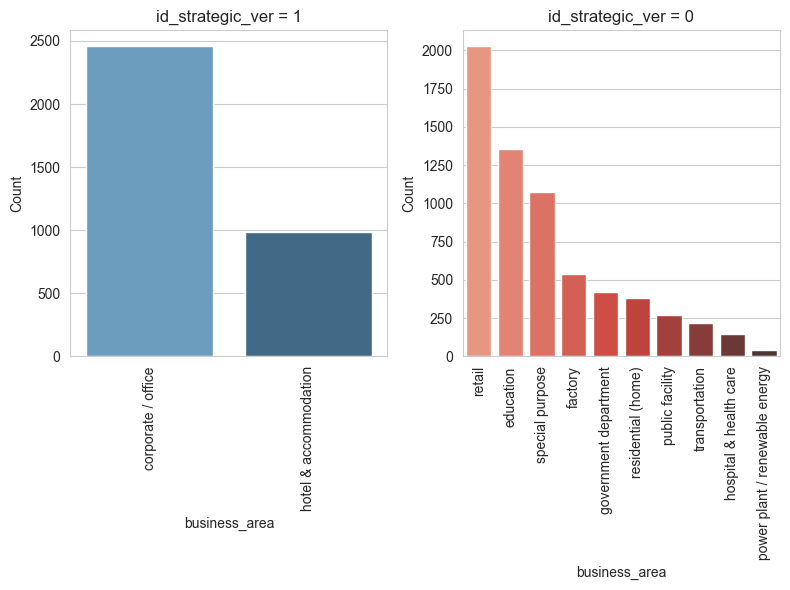

In [4307]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'ID']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['id_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['id_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


business_subarea (고객의 세부 사업 영역) 부분에서는 유의미한 차이가 보이지않음

id_strategic_ver 는 결국 business_unit이 'ID'이면서,  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

#### 10. it_strategic_ver

(도메인 지식)   
특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 It 사업부에 대한 변수

In [4308]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
1.0    1121
Name: count, dtype: int64

In [4309]:
# 누락된 값을 0으로 채우기
df_train['it_strategic_ver'].fillna(0, inplace=True)
df_test['it_strategic_ver'].fillna(0, inplace=True)

In [4310]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
0.0    58178
1.0     1121
Name: count, dtype: int64

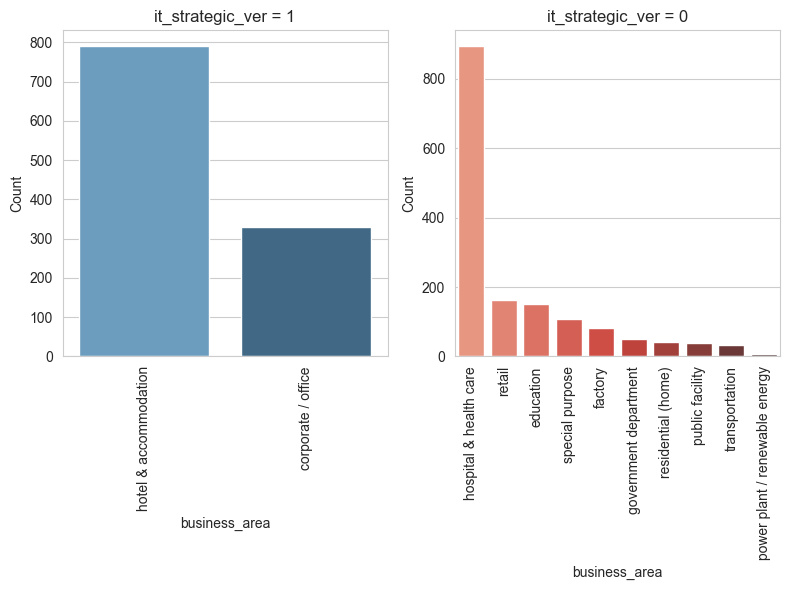

In [4311]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'IT']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['it_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['it_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('it_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('it_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


it_strategic_ver 는 business_unit이 'It'이면서,  
고객의 사업영역은 ID 사업부에서의 가중치와 동일하게  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

In [4312]:
# business_unit이 'IT'인 데이터만 선택
df_train_it = df_train[df_train['business_unit'] == 'IT']
df_train_it_no = df_train[df_train['business_unit'] != 'IT']

# business_unit이 'IT'인 데이터중에서도 it_strategic_ver = 1 인 값을 business_area 별로 나눔
df_train_it_ho = df_train_it[df_train_it['business_area'] == 'hotel & accommodation']
df_train_it_co = df_train_it[df_train_it['business_area'] == 'corporate / office']

In [4313]:
grouped = df_train_it_ho.groupby(["business_unit", "business_area", "business_subarea"])

# 'com_reg_ver_win_rate' 열의 모든 값의 종류를 출력
print(grouped['it_strategic_ver'].apply(lambda x: x.unique()))

grouped['it_strategic_ver'].value_counts()

business_unit  business_area          business_subarea
IT             hotel & accommodation  Cruise              [1.0]
Name: it_strategic_ver, dtype: object


business_unit  business_area          business_subarea  it_strategic_ver
IT             hotel & accommodation  Cruise            1.0                 1
Name: count, dtype: int64

In [4314]:
grouped = df_train_it_co.groupby(["business_unit", "business_area", "business_subarea"])

# 'com_reg_ver_win_rate' 열의 모든 값의 종류를 출력
print(grouped['it_strategic_ver'].apply(lambda x: x.unique()))

grouped['it_strategic_ver'].value_counts()

business_unit  business_area       business_subarea    
IT             corporate / office  Advertising             [1.0]
                                   Banking                 [1.0]
                                   Broadcasting & Media    [1.0]
                                   Construction            [1.0]
                                   Consulting              [1.0]
                                   Developer/Property      [1.0]
                                   Engineering             [1.0]
                                   Finance                 [1.0]
                                   Healthcare              [1.0]
                                   IT/Software             [1.0]
                                   Insurance               [1.0]
                                   Law Firm                [1.0]
                                   Manufacturing           [1.0]
                                   Others                  [1.0]
Name: it_strategic_ver, dtype: obj

business_unit  business_area       business_subarea      it_strategic_ver
IT             corporate / office  Advertising           1.0                  5
                                   Banking               1.0                  1
                                   Broadcasting & Media  1.0                  3
                                   Construction          1.0                  6
                                   Consulting            1.0                  9
                                   Developer/Property    1.0                  1
                                   Engineering           1.0                  6
                                   Finance               1.0                  4
                                   Healthcare            1.0                  4
                                   IT/Software           1.0                 27
                                   Insurance             1.0                  1
                                   Law Firm   

#### 11. idit_strategic_ver

Id_strategic_ver이나 it_strategic_ver 값 중   
하나라도 1의 값을 가지면 1 값으로 표현

In [4315]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
1.0    4565
Name: count, dtype: int64

In [4316]:
# 누락된 값을 0으로 채우기
df_train['idit_strategic_ver'].fillna(0, inplace=True)
df_test['idit_strategic_ver'].fillna(0, inplace=True)

In [4317]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
0.0    54734
1.0     4565
Name: count, dtype: int64

#### 12. customer_job

고객의 직업군

In [4318]:
df_train['customer_job'].value_counts()

customer_job
engineering                                                                     6342
other                                                                           4852
administrative                                                                  3359
education                                                                       2287
sales                                                                           2218
operations                                                                      1961
purchasing                                                                      1938
information technology                                                          1937
business development                                                            1801
consulting                                                                      1349
arts and design                                                                 1276
entrepreneurship                                    

In [4319]:
df_test['customer_job'].value_counts()

customer_job
engineering                         728
others                              482
education                           408
administrative                      307
information technology              231
operations                          195
purchasing                          180
consulting                          166
business development                164
sales                               162
entrepreneurship                    119
arts and design                     102
program and project management       96
marketing                            94
media and communication              48
support                              47
healthcare services                  44
finance                              42
product management                   36
accounting                           34
real estate                          26
other                                24
community and social services        22
legal                                17
human resources            

In [4320]:
def search_job(customer_job):
    # LG list 참고
    job = ['accounting','administrative','arts and design','business development','community and social services','consulting','curation','education','engineering', 'entrepreneurship','finance','healthcare services','human resources','information technology','legal','marketing','media and communication','military and protective services operations','product management', 'program and project management','purchasing','quality assurance','real estate','research','sales','support','others']

    # 'media and communications'를 'media and communication'으로 변환
    if customer_job == 'media and communications':
        customer_job = 'media and communication'
    
    if not customer_job:
        return 'others'
    elif customer_job in job:
        return customer_job
    else:
        return 'unknown'

df_train['customer_job'] = df_train['customer_job'].apply(search_job)
df_test['customer_job'] = df_test['customer_job'].apply(search_job)

In [4321]:
df_train['customer_job'].value_counts()

customer_job
unknown                           28683
engineering                        6342
administrative                     3359
education                          2287
sales                              2218
purchasing                         1938
information technology             1937
business development               1801
consulting                         1349
arts and design                    1276
entrepreneurship                   1192
marketing                          1161
program and project management      948
others                              763
media and communication             710
healthcare services                 632
product management                  573
finance                             463
accounting                          396
support                             358
real estate                         295
legal                               155
community and social services       137
research                            134
human resources            

In [4322]:
df_test['customer_job'].value_counts()

customer_job
unknown                           1684
engineering                        728
others                             482
education                          408
administrative                     307
information technology             231
purchasing                         180
consulting                         166
business development               164
sales                              162
entrepreneurship                   119
arts and design                    102
program and project management      96
marketing                           94
media and communication             49
support                             47
healthcare services                 44
finance                             42
product management                  36
accounting                          34
real estate                         26
community and social services       22
legal                               17
human resources                     14
research                             9
quality assu

In [4323]:
print(df_train['customer_job'].isnull().sum())

0


#### 13. lead_desc_length

고객이 작성한 Lead Descriptoin 텍스트 총 길이

In [4324]:
df_train['lead_desc_length'].value_counts()

lead_desc_length
3       10378
14       3180
2         934
10        891
4         884
5         818
1         771
23        766
11        718
7         656
18        643
35        617
12        604
17        587
15        580
9         579
8         539
28        525
13        522
16        516
6         502
22        498
20        497
33        491
29        490
24        483
19        474
21        462
34        435
27        419
37        416
30        406
25        394
26        387
31        373
32        367
36        354
38        331
43        316
41        313
46        300
40        292
42        276
50        269
39        267
49        265
51        264
47        259
48        256
45        253
57        248
44        246
60        242
52        238
53        231
56        229
58        223
72        216
64        213
73        210
55        208
54        207
70        206
68        203
77        202
59        202
63        202
61        196
65        195
66        191
76 

In [4325]:
print(df_train['lead_desc_length'].isnull().sum())

0


In [4326]:
# 누락된 값을 0으로 채우기
df_train['lead_desc_length'].fillna('Unknown', inplace=True)
df_test['lead_desc_length'].fillna('Unknown', inplace=True)

print(df_train['lead_desc_length'].isnull().sum())

0


#### 14. inquiry_type

고객의 문의 유형

In [4327]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
Usage or technical consultation                                                                                          668
Trainings                                                                                                                434
Technical Consultation                                                                                          

In [4328]:
# 'inquiry_type' 열의 철자오류에 대해 일관된 값으로 변환
## Ctrl + Shift + [ : 현재 영역 접기
df_train['inquiry_type'] = df_train['inquiry_type'].replace({

    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',

    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'technical': 'Usage or Technical Consultation',

    'sales':'Sales Inquiry',
    'Sales inquiry':'Sales Inquiry',

    'other': 'Other',
    'other_': 'Other',
    'others': 'Other',
    'Others' : 'Other',
    'Etc.': 'Other',
    'ETC.': 'Other'

})

df_test['inquiry_type'] = df_test['inquiry_type'].replace({

    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',

    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'technical': 'Usage or Technical Consultation',

    'sales':'Sales Inquiry',
    'Sales inquiry':'Sales Inquiry',

    'other': 'Other',
    'other_': 'Other',
    'others': 'Other',
    'Others' : 'Other',
    'Etc.': 'Other',
    'ETC.': 'Other'

})


In [4329]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation                                                                                     42384
Sales Inquiry                                                                                                          10081
Usage or Technical Consultation                                                                                         1668
Other                                                                                                                   1401
Product Information                                                                                                     1237
Trainings                                                                                                                434
Services                                                                                                                 415
Request for Partnership                                                                                         

In [4330]:
# 'inquiry_type' 열의 값별 개수를 계산합니다.
value_counts = df_train['inquiry_type'].value_counts()

# 2개 이하인 값들의 리스트를 만듭니다.
to_replace = value_counts[value_counts <= 2].index

# 2개 이하인 값들을 'Other'로 업데이트합니다.
df_train['inquiry_type'] = df_train['inquiry_type'].replace(to_replace, 'Other')


df_test 데이터에는 따로 처리 x

In [4331]:
# # 'inquiry_type' 열의 값별 개수를 계산합니다.
# value_counts = df_test['inquiry_type'].value_counts()

# # 10개 이하인 값들의 리스트를 만듭니다.
# to_replace = value_counts[value_counts <= 10].index

# # 10개 이하인 값들을 'Other'로 업데이트합니다.
# df_test['inquiry_type'] = df_test['inquiry_type'].replace(to_replace, 'Other')


In [4332]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    42384
Sales Inquiry                         10081
Usage or Technical Consultation        1668
Other                                  1441
Product Information                    1237
Trainings                               434
Services                                415
Request for Partnership                 297
Request a Demo                          184
Technical Support                       110
Request for Distributorship              75
Customer Suggestions                     12
IDB                                      10
Event Inquiry                             5
OEM/ODM Request                           5
Name: count, dtype: int64

In [4333]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Usage or Technical Consultation        187
Other                                  122
Product Information                     68
Request for Partnership                 63
Services                                34
Trainings                               21
Request a Demo                           9
Customer Suggestions                     4
OEM/ODM Request                          3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

In [4334]:
print(df_train['inquiry_type'].isnull().sum())

941


In [4335]:
# 'inquiry_type' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['inquiry_type'] = df_train['inquiry_type'].fillna('Unknown')
df_test['inquiry_type'] = df_test['inquiry_type'].fillna('Unknown')

In [4336]:
print(df_train['inquiry_type'].isnull().sum())

0


In [4337]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Unknown                               1292
Usage or Technical Consultation        187
Other                                  122
Product Information                     68
Request for Partnership                 63
Services                                34
Trainings                               21
Request a Demo                           9
Customer Suggestions                     4
OEM/ODM Request                          3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

#### 15. product_category

요청 제품 카테고리

In [4338]:
df_train['product_category'].value_counts()

product_category
interactive digital board                                                                               6154
vrf                                                                                                     5640
multi-split                                                                                             3674
video wall signage                                                                                      2029
etc.                                                                                                    2018
led signage                                                                                             1895
interactive signage                                                                                     1862
single-split                                                                                            1569
rac                                                                                                     1447
ol

In [4339]:
df_test['product_category'].value_counts()

product_category
vrf                          726
multi-split                  544
interactive signage          400
led signage                  289
etc.                         202
single-split                 179
video wall signage           167
hotel tv                     134
standard signage             118
oled signage                 104
chiller                       99
interactive digital board     74
heating                       67
monitor                       58
high brightness signage       40
medical display               32
ventilation                   31
one:quick series              22
cloud device                  18
webos                         14
laptop                        13
control                       13
projector                     12
software solution             11
pro:centric                   10
hospital tv                   10
special signage                9
accessories                    6
ess                            4
others                    

In [4340]:
df_train['product_category'] = df_train['product_category'].replace({
    'notebook': 'laptop',
    'others': 'other',
    'ess': 'other',
    'signage care solution': 'other',
})

print(df_train['product_category'].value_counts())

product_category
interactive digital board                                                                               6154
vrf                                                                                                     5640
multi-split                                                                                             3674
video wall signage                                                                                      2029
etc.                                                                                                    2018
led signage                                                                                             1895
interactive signage                                                                                     1862
single-split                                                                                            1569
rac                                                                                                     1447
ol

In [4341]:
df_test['product_category'] = df_test['product_category'].replace({
    'notebook': 'laptop',
    'others': 'other',
    'ess': 'other',
    'signage care solution': 'other',
})

print(df_test['product_category'].value_counts())

product_category
vrf                          726
multi-split                  544
interactive signage          400
led signage                  289
etc.                         202
single-split                 179
video wall signage           167
hotel tv                     134
standard signage             118
oled signage                 104
chiller                       99
interactive digital board     74
heating                       67
monitor                       58
high brightness signage       40
medical display               32
ventilation                   31
one:quick series              22
cloud device                  18
webos                         14
laptop                        14
control                       13
projector                     12
software solution             11
hospital tv                   10
pro:centric                   10
other                         10
special signage                9
accessories                    6
Name: count, dtype: int64


In [4342]:
# 'product_category'의 빈도 계산
counts_train = df_train['product_category'].value_counts()

# 빈도가 특정수치 이하인 product_category 를 찾음
find_count_train = counts_train[counts_train <= 15].index

# 빈도가 특정수치 이하값 
df_train.loc[df_train['product_category'].isin(find_count_train), 'product_category'] = 'other'

In [4343]:
print(df_train['product_category'].value_counts())

product_category
interactive digital board            6154
vrf                                  5640
multi-split                          3674
video wall signage                   2029
etc.                                 2018
led signage                          1895
interactive signage                  1862
single-split                         1569
rac                                  1447
oled signage                         1350
hotel tv                             1112
chiller                              1051
standard signage                      996
medical display                       962
other                                 823
lg one:quick series                   768
monitor                               762
one:quick series                      668
heating                               655
high brightness signage               477
ventilation                           420
teto ou cassete inverter              308
control                               263
multi inverter   

In [4344]:
print(df_test['product_category'].value_counts())

product_category
vrf                          726
multi-split                  544
interactive signage          400
led signage                  289
etc.                         202
single-split                 179
video wall signage           167
hotel tv                     134
standard signage             118
oled signage                 104
chiller                       99
interactive digital board     74
heating                       67
monitor                       58
high brightness signage       40
medical display               32
ventilation                   31
one:quick series              22
cloud device                  18
webos                         14
laptop                        14
control                       13
projector                     12
software solution             11
hospital tv                   10
pro:centric                   10
other                         10
special signage                9
accessories                    6
Name: count, dtype: int64


In [4345]:
print(df_train['product_category'].isnull().sum())

19374


In [4346]:
# 'product_category' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_category'] = df_train['product_category'].fillna('unknown')
df_test['product_category'] = df_test['product_category'].fillna('unknown')

In [4347]:
print(df_train['product_category'].isnull().sum())

0


#### 16. product_subcategory

요청 제품 하위 카테고리

In [4348]:
df_train['product_subcategory'].value_counts()

product_subcategory
All Medical Displays                                  446
Interactive Digital Board                             417
TR3BF Series                                          374
Transparent OLED Signage                              288
Diagnostic Monitors                                   284
Transparent LED Film                                  280
49" 500 nits FHD Slim Bezel Video Wall                268
TR3DJ Series                                          246
One:Quick Flex                                        243
One:Quick Works                                       228
55" 500 nits FHD 0.44mm Even Bezel Video Wall         209
55" 700 nits FHD 0.44mm Even Bezel Video Wall         180
Digital X-ray Detectors                               167
UH5F-H Series                                         156
US660H Series                                         151
4K UHD Hospitality TV with Pro:Centric Direct         127
VL5F Series                                         

In [4349]:
df_test['product_subcategory'].value_counts()

product_subcategory
Digital Signage or Commercial TVs                                                                       86
Transparent LED Film                                                                                    52
TR3DJ Series                                                                                            32
Interactive Digital Board                                                                               29
Curvable OLED Signage                                                                                   24
High Brightness Series                                                                                  23
Transparent OLED Signage                                                                                22
55" 500 nits FHD 0.44mm Even Bezel Video Wall                                                           20
55" 700 nits FHD 0.44mm Even Bezel Video Wall                                                           19
Transparent OLED 

In [4350]:
print(df_train['product_subcategory'].isnull().sum())

50064


In [4351]:
# 'product_subcategory' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_subcategory'] = df_train['product_subcategory'].fillna('Unknown')
df_test['product_subcategory'] = df_test['product_subcategory'].fillna('Unknown')

#### 17. product_modelname

요청 제품 모델명

In [4352]:
df_train['product_modelname'].value_counts()

product_modelname
UltraFine Ergo(32UN880)                                                                                523
28MQ780                                                                                                479
All Medical Displays                                                                                   350
43HT3WJ                                                                                                290
55CT5WJ                                                                                                261
55VSM5J                                                                                                199
Ergo Dual(27QP88D)                                                                                     167
Diagnostic Monitors                                                                                    167
75TC3D                                                                                                 159
55VSH7J            

In [4353]:
print(df_train['product_modelname'].isnull().sum())

50070


In [4354]:
# 'product_modelname' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_modelname'] = df_train['product_modelname'].fillna('Unknown')
df_test['product_modelname'] = df_test['product_modelname'].fillna('Unknown')

In [4355]:
print(df_train['product_modelname'].isnull().sum())

0


#### 18. customer_country.1

담당 자사 법인명 기반의 지역 정보(대륙)

In [4356]:
df_test['customer_country.1'].value_counts()

customer_country.1
/  / Peru                                                                                                      184
//United States                                                                                                160
Corporate /  /                                                                                                 135
/  / Brazil                                                                                                    132
/  / India                                                                                                     116
/ São Paulo / Brazil                                                                                           116
/  / United States                                                                                              76
/  / U.A.E                                                                                                      62
/  / Mexico                                                  

In [4357]:
def process_customer_country_tokenized(df, column_name):
    for i, entry in enumerate(df[column_name]):
        if isinstance(entry, str):
            tokens = [token.strip() for token in entry.replace('/', ',').split(',') if token.strip() != '']
            if tokens:
                df.at[i, column_name] = tokens[-1]
            else:
                df.at[i, column_name] = np.nan
        else:
            df.at[i, column_name] = np.nan
    return df

In [4358]:
df_train = process_customer_country_tokenized(df_train, 'customer_country.1')
df_test = process_customer_country_tokenized(df_test, 'customer_country.1')

In [4359]:
df_test['customer_country.1'].value_counts()

customer_country.1
Brazil                                       1045
India                                         906
United States                                 769
Philippines                                   289
Peru                                          211
Mexico                                        180
Corporate                                     135
Colombia                                      127
U.A.E                                         120
Italy                                         120
Chile                                         108
Saudi Arabia                                  102
Indonesia                                      95
Egypt                                          95
Vietnam                                        69
Germany                                        67
Australia                                      66
Argentina                                      65
Türkiye                                        51
Hong Kong                      

In [4360]:
df_test['customer_country.1'].value_counts()

customer_country.1
Brazil                                       1045
India                                         906
United States                                 769
Philippines                                   289
Peru                                          211
Mexico                                        180
Corporate                                     135
Colombia                                      127
U.A.E                                         120
Italy                                         120
Chile                                         108
Saudi Arabia                                  102
Indonesia                                      95
Egypt                                          95
Vietnam                                        69
Germany                                        67
Australia                                      66
Argentina                                      65
Türkiye                                        51
Hong Kong                      

In [4361]:
# 미국 주 이름 카테고리화
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

df_train['customer_country.1'] = df_train['customer_country.1'].replace(us_states, 'United States')
df_test['customer_country.1'] = df_test['customer_country.1'].replace(us_states, 'United States')

In [4362]:
asia = ['Australia', 'Bangladesh', 'Brunei', 'Cambodia', 'China', 'Fiji', 'Hong Kong', 'India', 'Indonesia', 'Laos', 'Malaysia', 'Maldives', 'Myanmar', 'Nepal', 'New Zealand', 'Papula New Guinea', 'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand', 'Vietnam', 'Japan', 'South Korea']
cis = ['Belarus', 'Kazakhstan', 'Mongolia', 'Russia', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
europe = ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Isle of Man', 'Malta']
latin_america_and_the_caribbean = ['Anguilla', 'Antigua', 'Argentina', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia', 'COLOMBIA', 'Costa Rica', 'Cuba', 'Curacao', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Netherlands Antilles', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Saint Lucia', 'St Kitts', 'St Maarten', 'St Vincent', 'Suriname', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'US Virgin Islands', 'Venezuela', 'Antigua and Barbuda', 'Saint Kitts and Nevis']
middle_east_and_africa = ['Afghanistan', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bahrain', 'Benin', 'Botswana', 'Burkina Faso Cameroon', 'Central African Republic', 'Congo', "Cote d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'EGYPT', 'Equatorial Guinea', 'Ethiopia', 'Egypt', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guinea Iran', 'Iraq', 'Israel', 'Ivory Coast', 'Jordan', 'Kenya', 'Kuwait', 'Lebanon', 'Liberia', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Nigeria', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Rwanda', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Swaziland', 'Syria', 'Togo', 'Tunisia', 'Türkiye', 'Turkey', 'U.A.E', 'Uganda', 'United Republic of Tanzania', 'Yemen', 'Zambia', 'Eritrea', 'Libya Malawi', 'Zimbabwe']
north_america = ['Canada', 'United States', 'UNITED STATES']
# Corporate ->  특정 국가나 지역을 나타내는 것이 아니라, 보통 기업이나 조직을 나타내는 용어

continent_dict = {country: 'Asia' for country in asia}
continent_dict.update({country: 'CIS' for country in cis})
continent_dict.update({country: 'Europe' for country in europe})
continent_dict.update({country: 'Latin America and the Caribbean' for country in latin_america_and_the_caribbean})
continent_dict.update({country: 'Middle East & Africa' for country in middle_east_and_africa})
continent_dict.update({country: 'North America' for country in north_america})

df_train['customer_country.1'] = df_train['customer_country.1'].replace(continent_dict)
df_test['customer_country.1'] = df_test['customer_country.1'].replace(continent_dict)


In [4363]:
df_train['customer_country.1'].value_counts()

customer_country.1
Asia                                                            21911
Latin America and the Caribbean                                 17717
Europe                                                           6161
Middle East & Africa                                             5867
North America                                                    4137
New York                                                           28
CIS                                                                26
UAE Dubai                                                          23
USA                                                                16
Los Angeles                                                        15
700 Patroon Creek BlvdAlbanyNY12206                                15
Phoenix                                                            14
Washington                                                         14
Iran                                                               14
H

In [4364]:
df_test['customer_country.1'].value_counts()

customer_country.1
Latin America and the Caribbean              1831
Asia                                         1566
North America                                 807
Middle East & Africa                          448
Europe                                        392
Corporate                                     135
Wheaton                                         2
Moffett Field                                   2
Los Angeles                                     2
POMPANO BEACH                                   2
FT HUACHUCA                                     2
New Castle                                      2
San Antonio                                     1
San Juan                                        1
Shelbyville                                     1
Bothell                                         1
montclair                                       1
Sterling Heights                                1
W126 N7449 Flint Drive Menomonee Falls VA       1
233 South Beaudry Avenue  Los A

In [4365]:
# 'customer_country.1'의 빈도 계산
counts_train = df_train['customer_country.1'].value_counts()
counts_test = df_test['customer_country.1'].value_counts()

# 일정 빈도 이하 unknown 처리
find_count_train = counts_train[counts_train <= 30].index
find_count_test = counts_test[counts_test <= 2].index

# 일정 빈도 이하인 국가를 'Unknown'으로 설정
df_train.loc[df_train['customer_country.1'].isin(find_count_train), 'customer_country.1'] = 'Unknown'
df_test.loc[df_test['customer_country.1'].isin(find_count_test), 'customer_country.1'] = 'Unknown'

In [4366]:
print(df_train['customer_country.1'].isnull().sum())

1651


In [4367]:
df_train['customer_country.1'] = df_train['customer_country.1'].fillna('Unknown')
df_test['customer_country.1'] = df_test['customer_country.1'].fillna('Unknown')

In [4368]:
df_train['customer_country.1'].value_counts()

customer_country.1
Asia                               21911
Latin America and the Caribbean    17717
Europe                              6161
Middle East & Africa                5867
North America                       4137
Unknown                             3506
Name: count, dtype: int64

In [4369]:
df_test['customer_country.1'].value_counts()

customer_country.1
Latin America and the Caribbean    1831
Asia                               1566
North America                       807
Middle East & Africa                448
Europe                              392
Corporate                           135
Unknown                              92
Name: count, dtype: int64

In [4370]:
print(df_train['customer_country.1'].isnull().sum())

0


#### 19. customer_position

고객의 회사 직책

In [4371]:
df_train['customer_position'].value_counts()

customer_position
none                                                                                      19680
manager                                                                                    8217
ceo/founder                                                                                7984
other                                                                                      6499
director                                                                                   4843
associate/analyst                                                                          2597
partner                                                                                    2536
entry level                                                                                2216
others                                                                                      964
c-level executive                                                                           851
trainee               

In [4372]:
df_test['customer_position'].value_counts()

customer_position
none                                                                                      1957
manager                                                                                    726
others                                                                                     639
ceo/founder                                                                                593
director                                                                                   343
associate/analyst                                                                          279
entry level                                                                                225
partner                                                                                    224
c-level executive                                                                           85
intern                                                                                      60
vice president                  

In [4373]:
df_train['customer_position'].value_counts()

customer_position
none                                                                                      19680
manager                                                                                    8217
ceo/founder                                                                                7984
other                                                                                      6499
director                                                                                   4843
associate/analyst                                                                          2597
partner                                                                                    2536
entry level                                                                                2216
others                                                                                      964
c-level executive                                                                           851
trainee               

In [4374]:
df_train['customer_position'] = df_train['customer_position'].replace({
    'vicepresident': 'vice president',
    'vp': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'founder': 'ceo/founder',
    'ceo/fundador': 'ceo/founder',
    'commercial consultant': 'consultant',
    'architect/consultant': 'consultant',
    'architecture/consult': 'consultant',
    'business unit director': 'director',
    'no influence': 'none',
    'not applicable': 'none',
    'commercial end-user': 'end-user',
    'exhibitiontv': 'exhibition',
    'decision-influencer': 'decision influencer',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'business development': 'business development/sales',
    'medical device manufacturer': 'manufacturer',
    'assistant professor of enlish': 'assistant professor',
    'asst prof.': 'assistant professor',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'principal & director': 'director',
    'others': 'other',
    'decision-maker': 'decision maker',
})

df_test['customer_position'] = df_test['customer_position'].replace({
    'vicepresident': 'vice president',
    'vp': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'founder': 'ceo/founder',
    'ceo/fundador': 'ceo/founder',
    'commercial consultant': 'consultant',
    'architect/consultant': 'consultant',
    'architecture/consult': 'consultant',
    'business unit director': 'director',
    'no influence': 'none',
    'not applicable': 'none',
    'commercial end-user': 'end-user',
    'exhibitiontv': 'exhibition',
    'decision-influencer': 'decision influencer',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'business development': 'business development/sales',
    'medical device manufacturer': 'manufacturer',
    'assistant professor of enlish': 'assistant professor',
    'asst prof.': 'assistant professor',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'principal & director': 'director',
    'others': 'other'
})

# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_position'].unique(), columns=['customer_position'])
counts = df_train['customer_position'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
# table_df

In [4375]:
df_test['customer_position'].value_counts()

customer_position
none                                                                                      1957
manager                                                                                    726
other                                                                                      664
ceo/founder                                                                                593
director                                                                                   343
associate/analyst                                                                          279
entry level                                                                                225
partner                                                                                    224
c-level executive                                                                           85
intern                                                                                      60
vice president                  

In [4376]:
## train
# 'inquiry_type' 열의 값별 개수 계산
counts_train = df_train['customer_position'].value_counts()
counts_test = df_test['customer_position'].value_counts()

# 특정수 이하인 값들의 리스트로 만듬
replace_train = counts_train[counts_train <= 40].index
replace_test = counts_test[counts_test <= 2].index

# 특정수 이하인 값들을 'other'로 업데이트
df_train['customer_position'] = df_train['customer_position'].replace(replace_train, 'other')
df_test['customer_position'] = df_test['customer_position'].replace(replace_test, 'other')

In [4377]:
df_train['customer_position'].value_counts()

customer_position
none                 19690
manager               8217
ceo/founder           7988
other                 7841
director              4846
associate/analyst     2597
partner               2536
entry level           2219
c-level executive      857
trainee                849
vice president         521
intern                 446
end-user               431
hospital               201
installer               60
Name: count, dtype: int64

In [4378]:
df_test['customer_position'].value_counts()

customer_position
none                 1957
manager               726
other                 676
ceo/founder           593
director              343
associate/analyst     279
entry level           225
partner               224
c-level executive      85
intern                 60
vice president         54
trainee                49
Name: count, dtype: int64

In [4379]:
print(df_train['customer_position'].isnull().sum())

0


#### 20. response_corporate

담당 자사 법인명

In [4380]:
df_train['response_corporate'].value_counts()

response_corporate
LGEIL    16908
LGESP     9311
LGEUS     5955
LGEMS     2768
LGEPH     2651
LGEGF     2149
LGECB     2079
LGEUK     1651
LGESJ     1469
LGECL     1339
LGEPS     1252
LGEIS     1146
LGEPR     1131
LGEDG     1051
LGEPL      850
LGEEG      704
LGEVH      614
LGEES      592
LGETK      541
LGEAR      491
LGEKR      433
LGEHK      383
LGEAP      366
LGESL      348
LGEMK      331
LGEFS      302
LGEAF      288
LGEIN      281
LGELF      274
LGESA      268
LGECI      263
LGETH      185
LGEEF      159
LGEPT      111
LGEML      110
LGEBN       99
LGEYK       78
LGECH       65
LGEHS       51
LGETT       47
LGEJP       41
LGEAS       33
LGESW       31
LGEMC       30
LGERO       29
LGEEB       13
LGEAG        8
LGERA        8
LGECZ        7
LGELA        2
LGEUR        1
LGEIR        1
LGEBT        1
Name: count, dtype: int64

In [4381]:
print(df_train['response_corporate'].isnull().sum())

0


#### 21. expected_timeline

고객의 요청한 처리 일정

In [4382]:
df_train['expected_timeline'].value_counts()

expected_timeline
less than 3 months                                                                                                                                                                                                                                                 17250
3 months ~ 6 months                                                                                                                                                                                                                                                 5026
more than a year                                                                                                                                                                                                                                                    3023
9 months ~ 1 year                                                                                                                                                                          

In [4383]:
import numpy as np

# 'months' , 'year'를 포함하지 않는 데이터를 'etc.'로 변경
df_train['expected_timeline'] = np.where(df_train['expected_timeline'].str.contains('months|year', na=False), df_train['expected_timeline'], 'etc.')
df_test['expected_timeline'] = np.where(df_test['expected_timeline'].str.contains('months|year', na=False), df_test['expected_timeline'], 'etc.')

In [4384]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                                                                                                                                                                                                                                                        31574
less than 3 months                                                                                                                                                                                                                                          17250
3 months ~ 6 months                                                                                                                                                                                                                                          5026
more than a year                                                                                                                                                                                                

In [4385]:
df_test['expected_timeline'].value_counts()

expected_timeline
etc.                   2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

In [4386]:
df_train['expected_timeline'] = df_train['expected_timeline'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months',
    '9 months - 1 year': '9 months ~ 1 year',
    'duplicate lead - il220100042906. less than 3 months': 'less than 3 months',
    'less than 3 months ,meeting with the customer for the more details and tentative boq will ne 32 and 43': 'less than 3 months',

    'less_than_3_months': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'need to discuss with client in next two months. they need to check the product and accridngly proceed for personal use.': 'less than 3 months',
    'quotation sent – 75tr3dj , work in progress, he will buy after 2 months. he has not even seen the quote yet.': 'less than 3 months',
    'quote shared with customer, he will confirm after 2 months. lead shared with partner.': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'less than 3 months. customer not answered . to call back': 'less than 3 months',

    'purchase planning after 3 months': '3 months ~ 6 months',
    'needs hotel tv after 4 months, will call us.': '3 months ~ 6 months',

    'we are already in touch with this cutsomer from last 2 years, he has never purchased any product till date. i called him up twice but no reponse.' : 'etc.',
    'very abrupt customer. said the inquiry was made months ago and was rude enough. closing in the system as the client behaviour has no scope to discuss on requirement. need marketing team to check if the case was received in dec or jan as per client.' : 'etc.',

    # 아래 값들은 근사 기간으로 넣어줌
    'more then 3 months': '3 months ~ 6 months',
    'less than 5 months': '3 months ~ 6 months',
    'less than 6 months': '3 months ~ 6 months',
    'less then 6 months': '3 months ~ 6 months',
    '3 months': '3 months ~ 6 months',
    '4/8 months': '3 months ~ 6 months',

})
df_test['customer_position'] = df_test['customer_position'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months'
})


In [4387]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                   31576
less than 3 months     17333
3 months ~ 6 months     5153
more than a year        3027
9 months ~ 1 year       1108
6 months ~ 9 months     1102
Name: count, dtype: int64

In [4388]:
df_test['expected_timeline'].value_counts()

expected_timeline
etc.                   2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

In [4389]:
print(df_train['expected_timeline'].isnull().sum())

0


#### 22. ver_cus

특정 Vertical Level 1(사업영역) 이면서  
Customer_type(고객 유형)이 소비자(End-user)인  
경우에 대한 가중치

In [4390]:
df_train['ver_cus'].value_counts()

ver_cus
0    56832
1     2467
Name: count, dtype: int64

In [4391]:
ss = df_train[df_train['ver_cus'] == 1]
ss['customer_type'].value_counts()

customer_type
End Customer    2463
End-user           4
Name: count, dtype: int64

In [4392]:
ss = df_test[df_test['ver_cus'] == 1]
ss['customer_type'].value_counts()

customer_type
End Customer    774
Name: count, dtype: int64

End Customer가 End-user에 해당한다는것을 알수 있음으로 값을 바꿔준다

In [4393]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'End Customer': 'End-user'
})
df_test['customer_type'] = df_test['customer_type'].replace({
    'End Customer': 'End-user'
})

In [4394]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['customer_type'].value_counts()

customer_type
End-user    2467
Name: count, dtype: int64

In [4395]:
find_end_user = df_train[df_train['customer_type'] == 'End-user']
find_end_user['business_area'].value_counts()

business_area
corporate / office                1117
hospital & health care             994
retail                             768
special purpose                    477
education                          472
residential (home)                 357
factory                            301
government department              157
public facility                    129
hotel & accommodation              117
transportation                      74
power plant / renewable energy      68
Name: count, dtype: int64

In [4396]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       1113
retail                    765
education                 472
hotel & accommodation     117
Name: count, dtype: int64

In [4397]:
find_end_user = df_test[df_test['customer_type'] == 'End-user']
find_end_user['business_area'].value_counts()

business_area
corporate / office                382
transportation                    254
retail                            168
hotel & accommodation             131
education                          93
hospital & health care             85
residential (home)                 73
special purpose                    51
factory                            48
public facility                    27
government department              25
power plant / renewable energy     11
Name: count, dtype: int64

In [4398]:
find_ver_cus = df_test[df_test['ver_cus'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       382
retail                   168
hotel & accommodation    131
education                 93
Name: count, dtype: int64

business_area에 대해서는  
'corporate / office', 'retail', 'education', 'hotel & accommodation'   
다음의 Vertical Level 1(사업영역)에 해당함을 확인할수 있음

시각화를 해보면 아래와 같음(참고정도)

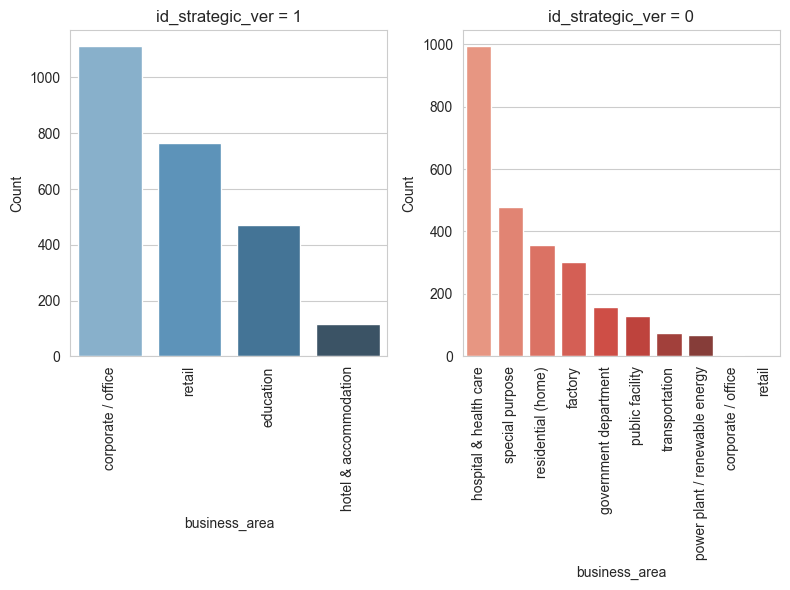

In [4399]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['customer_type'] == 'End-user']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_ver_cus_1 = df_train_id[df_train_id['ver_cus'] == 1]
df_train_ver_cus_0 = df_train_id[df_train_id['ver_cus'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_ver_cus_1 = df_train_ver_cus_1['business_area'].value_counts()
count_ver_cus_0 = df_train_ver_cus_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_ver_cus_1.index, y=count_ver_cus_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_ver_cus_0.index, y=count_ver_cus_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [4400]:
print(df_train['ver_cus'].isnull().sum())

0


#### 23. ver_pro

특정 Vertical Level 1(사업영역) 이면서   
특정 Product Category(제품 유형)인   
경우에 대한 가중치

In [4401]:
df_train['ver_pro'].value_counts()

ver_pro
0    56286
1     3013
Name: count, dtype: int64

In [4402]:
df_test['product_category'].value_counts()

product_category
unknown                      1858
vrf                           726
multi-split                   544
interactive signage           400
led signage                   289
etc.                          202
single-split                  179
video wall signage            167
hotel tv                      134
standard signage              118
oled signage                  104
chiller                        99
interactive digital board      74
heating                        67
monitor                        58
high brightness signage        40
medical display                32
ventilation                    31
one:quick series               22
cloud device                   18
laptop                         14
webos                          14
control                        13
projector                      12
software solution              11
hospital tv                    10
other                          10
pro:centric                    10
special signage                

In [4403]:
find_ver_cus = df_train[df_train['ver_pro'] == 1]
find_ver_cus['product_category'].value_counts()

product_category
video wall signage                   667
led signage                          641
interactive signage                  406
oled signage                         390
standard signage                     325
hotel tv                             259
high brightness signage              205
special signage                       47
other                                 36
monitor signage,monior/monitor tv     11
smart tv signage                      10
uhd signage                            9
digital signage                        7
Name: count, dtype: int64

In [4404]:
find_ver_cus = df_train[df_train['ver_pro'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       1566
retail                   1188
hotel & accommodation     259
Name: count, dtype: int64

In [4405]:
find_ver_cus = df_test[df_test['ver_pro'] == 1]
find_ver_cus['product_category'].value_counts()

product_category
led signage                114
hotel tv                    95
standard signage            65
video wall signage          62
interactive signage         47
oled signage                29
high brightness signage     12
special signage              5
Name: count, dtype: int64

In [4406]:
find_ver_cus = df_test[df_test['ver_pro'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       201
retail                   133
hotel & accommodation     95
Name: count, dtype: int64

In [4407]:
print(df_train['ver_pro'].isnull().sum())

0


#### 24. ver_win_rate_x

전체 Lead 중에서 Vertical을 기준으로  
[a] Vertical 수 비율  
[b] Vertical 별 Lead 수 대비 영업 전환 성공 비율 값  
[a] , [b] 를 곱한 값

In [4408]:
df_train['ver_win_rate_x'].value_counts()

ver_win_rate_x
0.003079    4097
0.001183    3011
0.000717    2013
0.000543    1929
0.000298    1818
0.000572    1727
0.000060    1199
0.000215    1035
0.000097     650
0.000026     519
0.000013     306
0.000002     113
Name: count, dtype: int64

In [4409]:
df_train['ver_win_rate_x'].value_counts().sum()

18417

결측치 확인

In [4410]:
print(df_train['ver_win_rate_x'].isnull().sum())

40882


In [4411]:
sd = df_train[df_train['business_area'].isnull()]
total_count = sd['business_unit'].size
total_count

40882

결측값 동일 -> 구할수 없는 값에 대해서는 그냥 빈값으로 두어서 제공된 형태라 따로 계산할 필요 없어 보임

In [4412]:
# 'ver_win_rate_x' 변수에서 NaN 값을 0으로 대체
df_train['ver_win_rate_x'] = df_train['ver_win_rate_x'].fillna(0)
df_test['ver_win_rate_x'] = df_test['ver_win_rate_x'].fillna(0)

In [4413]:
print(df_train['ver_win_rate_x'].isnull().sum())

0


#### 25. ver_win_ratio_per_bu

특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산

In [4414]:
df_train['ver_win_ratio_per_bu'].value_counts()

ver_win_ratio_per_bu
0.064566    2460
0.049840    2028
0.020121    1365
0.048630    1356
0.026846    1278
0.064070    1075
0.071345     984
0.011583     788
0.022634     713
0.060924     540
0.079412     421
0.036913     403
0.035484     385
0.031579     271
0.053571     216
0.051471     210
0.028777     200
0.022727     173
0.128571     156
0.131148     148
0.227273      62
0.285714      43
0.034483      29
Name: count, dtype: int64

In [4415]:
df_train['business_area'].value_counts()

business_area
corporate / office                4097
retail                            3011
hotel & accommodation             2013
special purpose                   1929
residential (home)                1818
education                         1727
hospital & health care            1199
factory                           1035
government department              650
public facility                    519
transportation                     306
power plant / renewable energy     113
Name: count, dtype: int64

결측값 확인

In [4416]:
print(df_train['ver_win_ratio_per_bu'].isnull().sum())

43995


In [4417]:
grouped = df_train.groupby(["business_area","business_unit"])

# 'ver_win_ratio_per_bu' 열의 모든 값의 종류를 출력
print(grouped['ver_win_ratio_per_bu'].apply(lambda x: x.unique()))


business_area                   business_unit
corporate / office              AS               [0.0268456375838926]
                                ID               [0.0645661157024793]
                                IT                              [nan]
                                Solution         [0.0344827586206896]
education                       AS               [0.0514705882352941]
                                ID                [0.048629531388152]
                                IT                              [nan]
                                Solution                        [nan]
factory                         AS               [0.0369127516778523]
                                ID               [0.0609243697478991]
                                IT                              [nan]
                                Solution                        [nan]
government department           AS               [0.0227272727272727]
                                ID          

In [4418]:
grouped['ver_win_ratio_per_bu'].value_counts()

business_area                   business_unit  ver_win_ratio_per_bu
corporate / office              AS             0.026846                1278
                                ID             0.064566                2460
                                Solution       0.034483                  29
education                       AS             0.051471                 210
                                ID             0.048630                1356
factory                         AS             0.036913                 403
                                ID             0.060924                 540
government department           AS             0.022727                 173
                                ID             0.079412                 421
hospital & health care          AS             0.128571                 156
                                ID             0.131148                 148
hotel & accommodation           ID             0.071345                 984
power plant / renewa

In [4419]:
print(df_train['ver_win_ratio_per_bu'].isnull().sum())

43995


In [4420]:
# business_area, business_unit 그룹화하여 샘플 수 계산
grouped_counts = df_train.groupby(['business_area', 'business_unit']).size()

# business_area, business_unit, is_converted 그룹화하여 영업 전환된(is_converted) 샘플 수 계산
converted_counts = df_train[df_train['is_converted']].groupby(['business_area', 'business_unit']).size()

# business_area, business_unit별 샘플 수 대비 영업 전환된(is_converted) 샘플 수의 비율 계산
conversion_rates = converted_counts / grouped_counts

# 결과 출력
print(conversion_rates)

business_area                   business_unit
corporate / office              AS               0.029734
                                ID               0.088618
                                IT               0.033333
                                Solution         0.034483
education                       AS               0.066667
                                ID               0.064897
                                IT               0.046667
                                Solution              NaN
factory                         AS               0.059553
                                ID               0.068519
                                IT               0.337349
                                Solution              NaN
government department           AS               0.040462
                                ID               0.076010
                                IT                    NaN
                                Solution              NaN
hospital & health care    

In [4421]:
# 그룹별 값을 딕셔너리로 정의
group_values = {
    ('corporate / office', 'AS'): 0.029734,
    ('corporate / office', 'ID'): 0.088618,
    ('corporate / office', 'IT'): 0.033333,
    ('corporate / office', 'Solution'): 0.034483,
    ('education', 'AS'): 0.066667,
    ('education', 'ID'): 0.064897,
    ('education', 'IT'): 0.046667,
    ('education', 'Solution'): None,
    ('factory', 'AS'): 0.059553,
    ('factory', 'ID'): 0.068519,
    ('factory', 'IT'): 0.337349,
    ('factory', 'Solution'): None,
    ('government department', 'AS'): 0.040462,
    ('government department', 'ID'): 0.076010,
    ('government department', 'IT'): None,
    ('government department', 'Solution'): None,
    ('hospital & health care', 'AS'): 0.096154,
    ('hospital & health care', 'ID'): 0.128378,
    ('hospital & health care', 'IT'): 0.378771,
    ('hotel & accommodation', 'AS'): 0.004831,
    ('hotel & accommodation', 'ID'): 0.118902,
    ('hotel & accommodation', 'IT'): 0.002528,
    ('hotel & accommodation', 'Solution'): None,
    ('power plant / renewable energy', 'AS'): 0.129032,
    ('power plant / renewable energy', 'ID'): 0.279070,
    ('power plant / renewable energy', 'IT'): None,
    ('public facility', 'AS'): 0.030000,
    ('public facility', 'ID'): 0.099631,
    ('public facility', 'IT'): 0.025000,
    ('public facility', 'Solution'): None,
    ('residential (home)', 'AS'): 0.017582,
    ('residential (home)', 'ID'): 0.038961,
    ('residential (home)', 'IT'): 0.142857,
    ('residential (home)', 'Solution'): None,
    ('retail', 'AS'): 0.026650,
    ('retail', 'ID'): 0.061637,
    ('retail', 'IT'): 0.073620,
    ('retail', 'Solution'): None,
    ('special purpose', 'AS'): 0.028050,
    ('special purpose', 'ID'): 0.070698,
    ('special purpose', 'IT'): 0.046296,
    ('special purpose', 'Solution'): None,
    ('transportation', 'AS'): 0.037736,
    ('transportation', 'ID'): 0.064815,
    ('transportation', 'IT'): 0.060606,
    ('transportation', 'Solution'): None,
}

# 'business_area'와 'business_unit'에 해당하는 그룹별 값을 'ver_win_ratio_per_bu' 변수에 적용
df_train['ver_win_ratio_per_bu'] = df_train.apply(lambda row: group_values.get((row['business_area'], row['business_unit'])), axis=1)
df_test['ver_win_ratio_per_bu'] = df_test.apply(lambda row: group_values.get((row['business_area'], row['business_unit'])), axis=1)

In [4422]:
grouped = df_train.groupby(["business_area","business_unit"])

# 'ver_win_ratio_per_bu' 열의 모든 값의 종류를 출력
print(grouped['ver_win_ratio_per_bu'].apply(lambda x: x.unique()))


business_area                   business_unit
corporate / office              AS               [0.029734]
                                ID               [0.088618]
                                IT               [0.033333]
                                Solution         [0.034483]
education                       AS               [0.066667]
                                ID               [0.064897]
                                IT               [0.046667]
                                Solution              [nan]
factory                         AS               [0.059553]
                                ID               [0.068519]
                                IT               [0.337349]
                                Solution              [nan]
government department           AS               [0.040462]
                                ID                [0.07601]
                                IT                    [nan]
                                Solution              

In [4423]:
grouped = df_test.groupby(["business_area","business_unit"])

# 'ver_win_ratio_per_bu' 열의 모든 값의 종류를 출력
print(grouped['ver_win_ratio_per_bu'].apply(lambda x: x.unique()))


business_area                   business_unit
corporate / office              AS               [0.029734]
                                ID               [0.088618]
                                IT               [0.033333]
education                       AS               [0.066667]
                                ID               [0.064897]
                                IT               [0.046667]
factory                         AS               [0.059553]
                                ID               [0.068519]
                                IT               [0.337349]
government department           AS               [0.040462]
                                ID                [0.07601]
                                IT                    [nan]
hospital & health care          AS               [0.096154]
                                ID               [0.128378]
                                IT               [0.378771]
hotel & accommodation           AS               [0.00

In [4424]:
print(df_train['ver_win_ratio_per_bu'].isnull().sum())

41100


In [4425]:
print(df_test['ver_win_ratio_per_bu'].isnull().sum())

2902


In [4426]:
# 결측값 0값으로 대체
df_train['ver_win_ratio_per_bu'].fillna(0, inplace=True)
df_test['ver_win_ratio_per_bu'].fillna(0, inplace=True)

print(df_train['ver_win_ratio_per_bu'].isnull().sum())

0


#### 26. business_area

고객의 사업 영역

In [4427]:
df_train['business_area'].value_counts()

business_area
corporate / office                4097
retail                            3011
hotel & accommodation             2013
special purpose                   1929
residential (home)                1818
education                         1727
hospital & health care            1199
factory                           1035
government department              650
public facility                    519
transportation                     306
power plant / renewable energy     113
Name: count, dtype: int64

In [4428]:
print(df_train['business_area'].isnull().sum())

40882


In [4429]:
# 결측값 'unknown' 값으로 대체
df_train['business_area'].fillna('unknown', inplace=True)
df_test['business_area'].fillna('unknown', inplace=True)

print(df_train['business_area'].isnull().sum())

0


#### 27. business_subarea

고객의 세부 사업 영역

In [4430]:
df_train['business_subarea'].value_counts()

business_subarea
Others                                     1740
Other Stores                                280
Hospital                                    267
Manufacturing Factory / Plant               196
Construction                                191
Higher Education (College & University)     186
Engineering                                 183
Villa / Single-Family Home                  172
Apartment                                   163
Electronics & Telco                         135
K12 Kindergarten & Schools                  134
IT/Software                                 132
Advertising                                 120
Institute & Academy                         105
Clinic                                      104
Mixed-use (Multi Complex)                   104
Fashion                                      98
General Government Office                    91
Cruise                                       80
General Hospital                             63
Consulting             

In [4431]:
df_test['business_subarea'].value_counts()

business_subarea
Others                                     667
Hotel                                      123
Higher Education (College & University)    111
Other Stores                                82
K12 Kindergarten & Schools                  80
IT/Software                                 58
Hospital                                    42
Institute & Academy                         40
Manufacturing Factory / Plant               40
Engineering                                 36
Villa / Single-Family Home                  35
Construction                                34
Electronics & Telco                         31
Advertising                                 30
Apartment                                   29
Fashion                                     26
Mixed-use (Multi Complex)                   20
Clinic                                      19
Entertainment                               19
Shopping Mall                               15
General Hospital                           

In [4432]:
print(df_train['business_subarea'].isnull().sum())

53773


In [4433]:
# 결측값 'Unknown' 값으로 대체
df_train['business_subarea'].fillna('Unknown', inplace=True)
df_test['business_subarea'].fillna('Unknown', inplace=True)

print(df_train['business_subarea'].isnull().sum())

0


#### 28. lead_owner

영업 담당자 이름

In [4434]:
df_train['lead_owner'].value_counts()

lead_owner
174     4627
175     4120
97      2499
23      2453
194     2208
42      1215
96       981
185      880
363      839
115      734
38       693
125      690
402      490
108      487
124      468
816      464
341      462
167      459
100      457
0        429
68       427
16       413
487      405
176      374
40       355
342      346
662      327
422      326
27       317
359      305
205      304
39       304
15       301
279      294
441      281
25       272
155      271
103      270
233      265
374      257
405      246
393      238
589      237
46       235
21       228
831      227
78       223
436      219
148      216
642      215
153      215
694      213
654      208
384      204
187      200
45       198
788      195
638      180
717      171
29       168
414      165
391      163
81       153
285      151
214      151
344      150
71       150
388      148
225      148
166      146
480      146
798      145
435      145
20       144
234      143
423      142
2

In [4435]:
print(df_train['lead_owner'].isnull().sum())

0


#### 29. is_converted (Target)

영업 성공 여부
True일 시 성공 (True or False 값을 가짐)

In [4436]:
df_train['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

In [4437]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  59299 non-null  float64
 8   id_strategic_ver         59299 non-null  float64
 9   it_strategic_ver         59299 non-null  float64
 10  idit_strategic_ver       59299 non-null  float64
 11  customer_job             59299 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             59299 non-null  object 
 14  product_category      

### 레이블 인코딩

In [4438]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

# df_train과 df_test를 복사하여 새로운 데이터프레임을 생성
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# 레이블 인코딩 적용
for col in label_columns:
    encoder = LabelEncoder()
    combined_data = pd.concat([df_train_encoded[col], df_test_encoded[col]])
    encoder.fit(combined_data)
    df_train_encoded[col] = encoder.transform(df_train_encoded[col])
    df_test_encoded[col] = encoder.transform(df_test_encoded[col])


변수 ' 3. com_reg_ver_win_rate ' 에 대한 결측치 처리

In [4439]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_values(df):
    # 데이터에서 결측치가 없는 행과 결측치가 있는 행 분리
    train_data = df[df['com_reg_ver_win_rate'].notna()]
    test_data = df[df['com_reg_ver_win_rate'].isna()]

    # 'com_reg_ver_win_rate'를 예측하는 데 사용할 피처 선택
    features = ['business_area', 'business_unit', 'customer_country.1']   

    # 훈련 데이터와 테스트 데이터 준비
    X_train = train_data[features]
    y_train = train_data['com_reg_ver_win_rate']
    X_test = test_data[features]

    # 랜덤 포레스트 모델 생성 및 훈련
    model = RandomForestRegressor(random_state=0)
    model.fit(X_train, y_train)

    # 모델을 사용해 결측치 예측
    predicted_values = model.predict(X_test)

    # 예측값으로 결측치 대체
    df.loc[df['com_reg_ver_win_rate'].isna(), 'com_reg_ver_win_rate'] = predicted_values


# df_train_encoded에 대한 데이터 처리
fill_missing_values(df_train_encoded)

# df_test_encoded에 대한 데이터 처리
fill_missing_values(df_test_encoded)


In [4440]:
print(df_test_encoded['com_reg_ver_win_rate'].isnull().sum())

0


In [4441]:
# 결측값 0값으로 대체
df_train_encoded['com_reg_ver_win_rate'].fillna(0, inplace=True)
df_test_encoded['com_reg_ver_win_rate'].fillna(0, inplace=True)

print(df_train_encoded['com_reg_ver_win_rate'].isnull().sum())

0


In [4442]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   int32  
 3   business_unit            5271 non-null   int32  
 4   com_reg_ver_win_rate     5271 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            5271 non-null   int32  
 7   enterprise               5271 non-null   int32  
 8   historical_existing_cnt  5271 non-null   float64
 9   id_strategic_ver         5271 non-null   float64
 10  it_strategic_ver         5271 non-null   float64
 11  idit_strategic_ver       5271 non-null   float64
 12  customer_job             5271 non-null   int32  
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

### 파생변수 생성

In [4443]:
# 변수 'customerver_cus_business_area_type_weight' 생성
df_train_encoded['ver_cus_business_area'] = df_train_encoded['ver_cus'] * df_train_encoded['business_area']
df_test_encoded['ver_cus_business_area'] = df_test_encoded['ver_cus'] * df_test_encoded['business_area']

# 변수 'ver_pro_product_category' 생성
df_train_encoded['ver_pro_product_category'] = df_train_encoded['ver_pro'] * df_train_encoded['product_category']
df_test_encoded['ver_pro_product_category'] = df_test_encoded['ver_pro'] * df_test_encoded['product_category']

# 변수 'id_business_area' 생성
df_train_encoded['id_business_area'] = df_train_encoded['id_strategic_ver'] * df_train_encoded['business_area'] * df_train_encoded['business_unit']
df_test_encoded['id_business_area'] = df_test_encoded['id_strategic_ver'] * df_test_encoded['business_area'] * df_test_encoded['business_unit']

# 변수 'it_business_area' 생성
df_train_encoded['it_business_area'] = df_train_encoded['it_strategic_ver'] * df_train_encoded['business_area'] * df_train_encoded['business_unit']
df_test_encoded['it_business_area'] = df_test_encoded['it_strategic_ver'] * df_test_encoded['business_area'] * df_test_encoded['business_unit']

# 변수 'idit_business_area' 생성
df_train_encoded['idit_business_area'] = df_train_encoded['idit_strategic_ver'] * df_train_encoded['business_subarea']
df_test_encoded['idit_business_area'] = df_test_encoded['idit_strategic_ver'] * df_train_encoded['business_subarea']


# 변수 'com_sub_area' 생성
df_train_encoded['com_sub_area'] = df_train_encoded['business_area'] * df_train_encoded['business_subarea']
df_test_encoded['com_sub_area'] = df_test_encoded['business_area'] * df_test_encoded['business_subarea']

# # 변수 'com_sub_product' 생성
# df_train_encoded['com_sub_product'] = df_train_encoded['product_category'] * df_train_encoded['product_subcategory']
# df_test_encoded['com_sub_product'] = df_test_encoded['product_category'] * df_test_encoded['product_subcategory']


In [4444]:
df_train_encoded = df_train_encoded.drop(['ver_cus', 'ver_pro', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)
df_test_encoded = df_test_encoded.drop(['ver_cus', 'ver_pro', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)

In [4445]:
df_train_encoded = df_train_encoded.drop(['business_unit', 'business_area', 'business_subarea', 'product_subcategory'], axis=1)
df_test_encoded = df_test_encoded.drop(['business_unit', 'business_area', 'business_subarea', 'product_subcategory'], axis=1)

### 변수중요도

In [4446]:
import xgboost as xgb
import pandas as pd

# 데이터셋을 훈련 세트와 테스트 세트로 나누기
X = df_train_encoded.drop(columns=['is_converted'])
y = df_train_encoded['is_converted']

# 80%를 훈련 세트로, 20%를 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 데이터셋 준비
dtrain = xgb.DMatrix(X_train, label=y_train)
param = {'max_depth': 6, 'learning_rate': 0.03}
num_round = 200
bst = xgb.train(param, dtrain, num_round)

# 특성 중요도 확인
feature_importance = bst.get_score(importance_type='gain')

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.to_string())


                          Importance
customer_idx               22.583523
customer_type               2.953728
ver_win_rate_x              2.703543
lead_owner                  2.519918
customer_country.1          1.846144
ver_win_ratio_per_bu        1.788289
response_corporate          1.514861
bant_submit                 1.431609
com_sub_area                1.271162
lead_desc_length            1.221043
com_reg_ver_win_rate        1.159648
enterprise                  1.046260
idit_business_area          1.038008
historical_existing_cnt     0.998388
expected_timeline           0.980987
customer_country            0.924266
ver_cus_business_area       0.915887
product_category            0.820725
id_business_area            0.768230
product_modelname           0.635680
customer_position           0.549993
customer_job                0.542033
ver_pro_product_category    0.509424
inquiry_type                0.429764
it_business_area            0.149744


### 상관관계 히트맵

In [4447]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bant_submit               59299 non-null  float64
 1   customer_country          59299 non-null  int32  
 2   com_reg_ver_win_rate      59299 non-null  float64
 3   customer_idx              59299 non-null  int64  
 4   customer_type             59299 non-null  int32  
 5   enterprise                59299 non-null  int32  
 6   historical_existing_cnt   59299 non-null  float64
 7   customer_job              59299 non-null  int32  
 8   lead_desc_length          59299 non-null  int64  
 9   inquiry_type              59299 non-null  int32  
 10  product_category          59299 non-null  int32  
 11  product_modelname         59299 non-null  int32  
 12  customer_country.1        59299 non-null  int32  
 13  customer_position         59299 non-null  int32  
 14  respon

In [4448]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5271 non-null   int64  
 1   bant_submit               5271 non-null   float64
 2   customer_country          5271 non-null   int32  
 3   com_reg_ver_win_rate      5271 non-null   float64
 4   customer_idx              5271 non-null   int64  
 5   customer_type             5271 non-null   int32  
 6   enterprise                5271 non-null   int32  
 7   historical_existing_cnt   5271 non-null   float64
 8   customer_job              5271 non-null   int32  
 9   lead_desc_length          5271 non-null   int64  
 10  inquiry_type              5271 non-null   int32  
 11  product_category          5271 non-null   int32  
 12  product_modelname         5271 non-null   int32  
 13  customer_country.1        5271 non-null   int32  
 14  customer

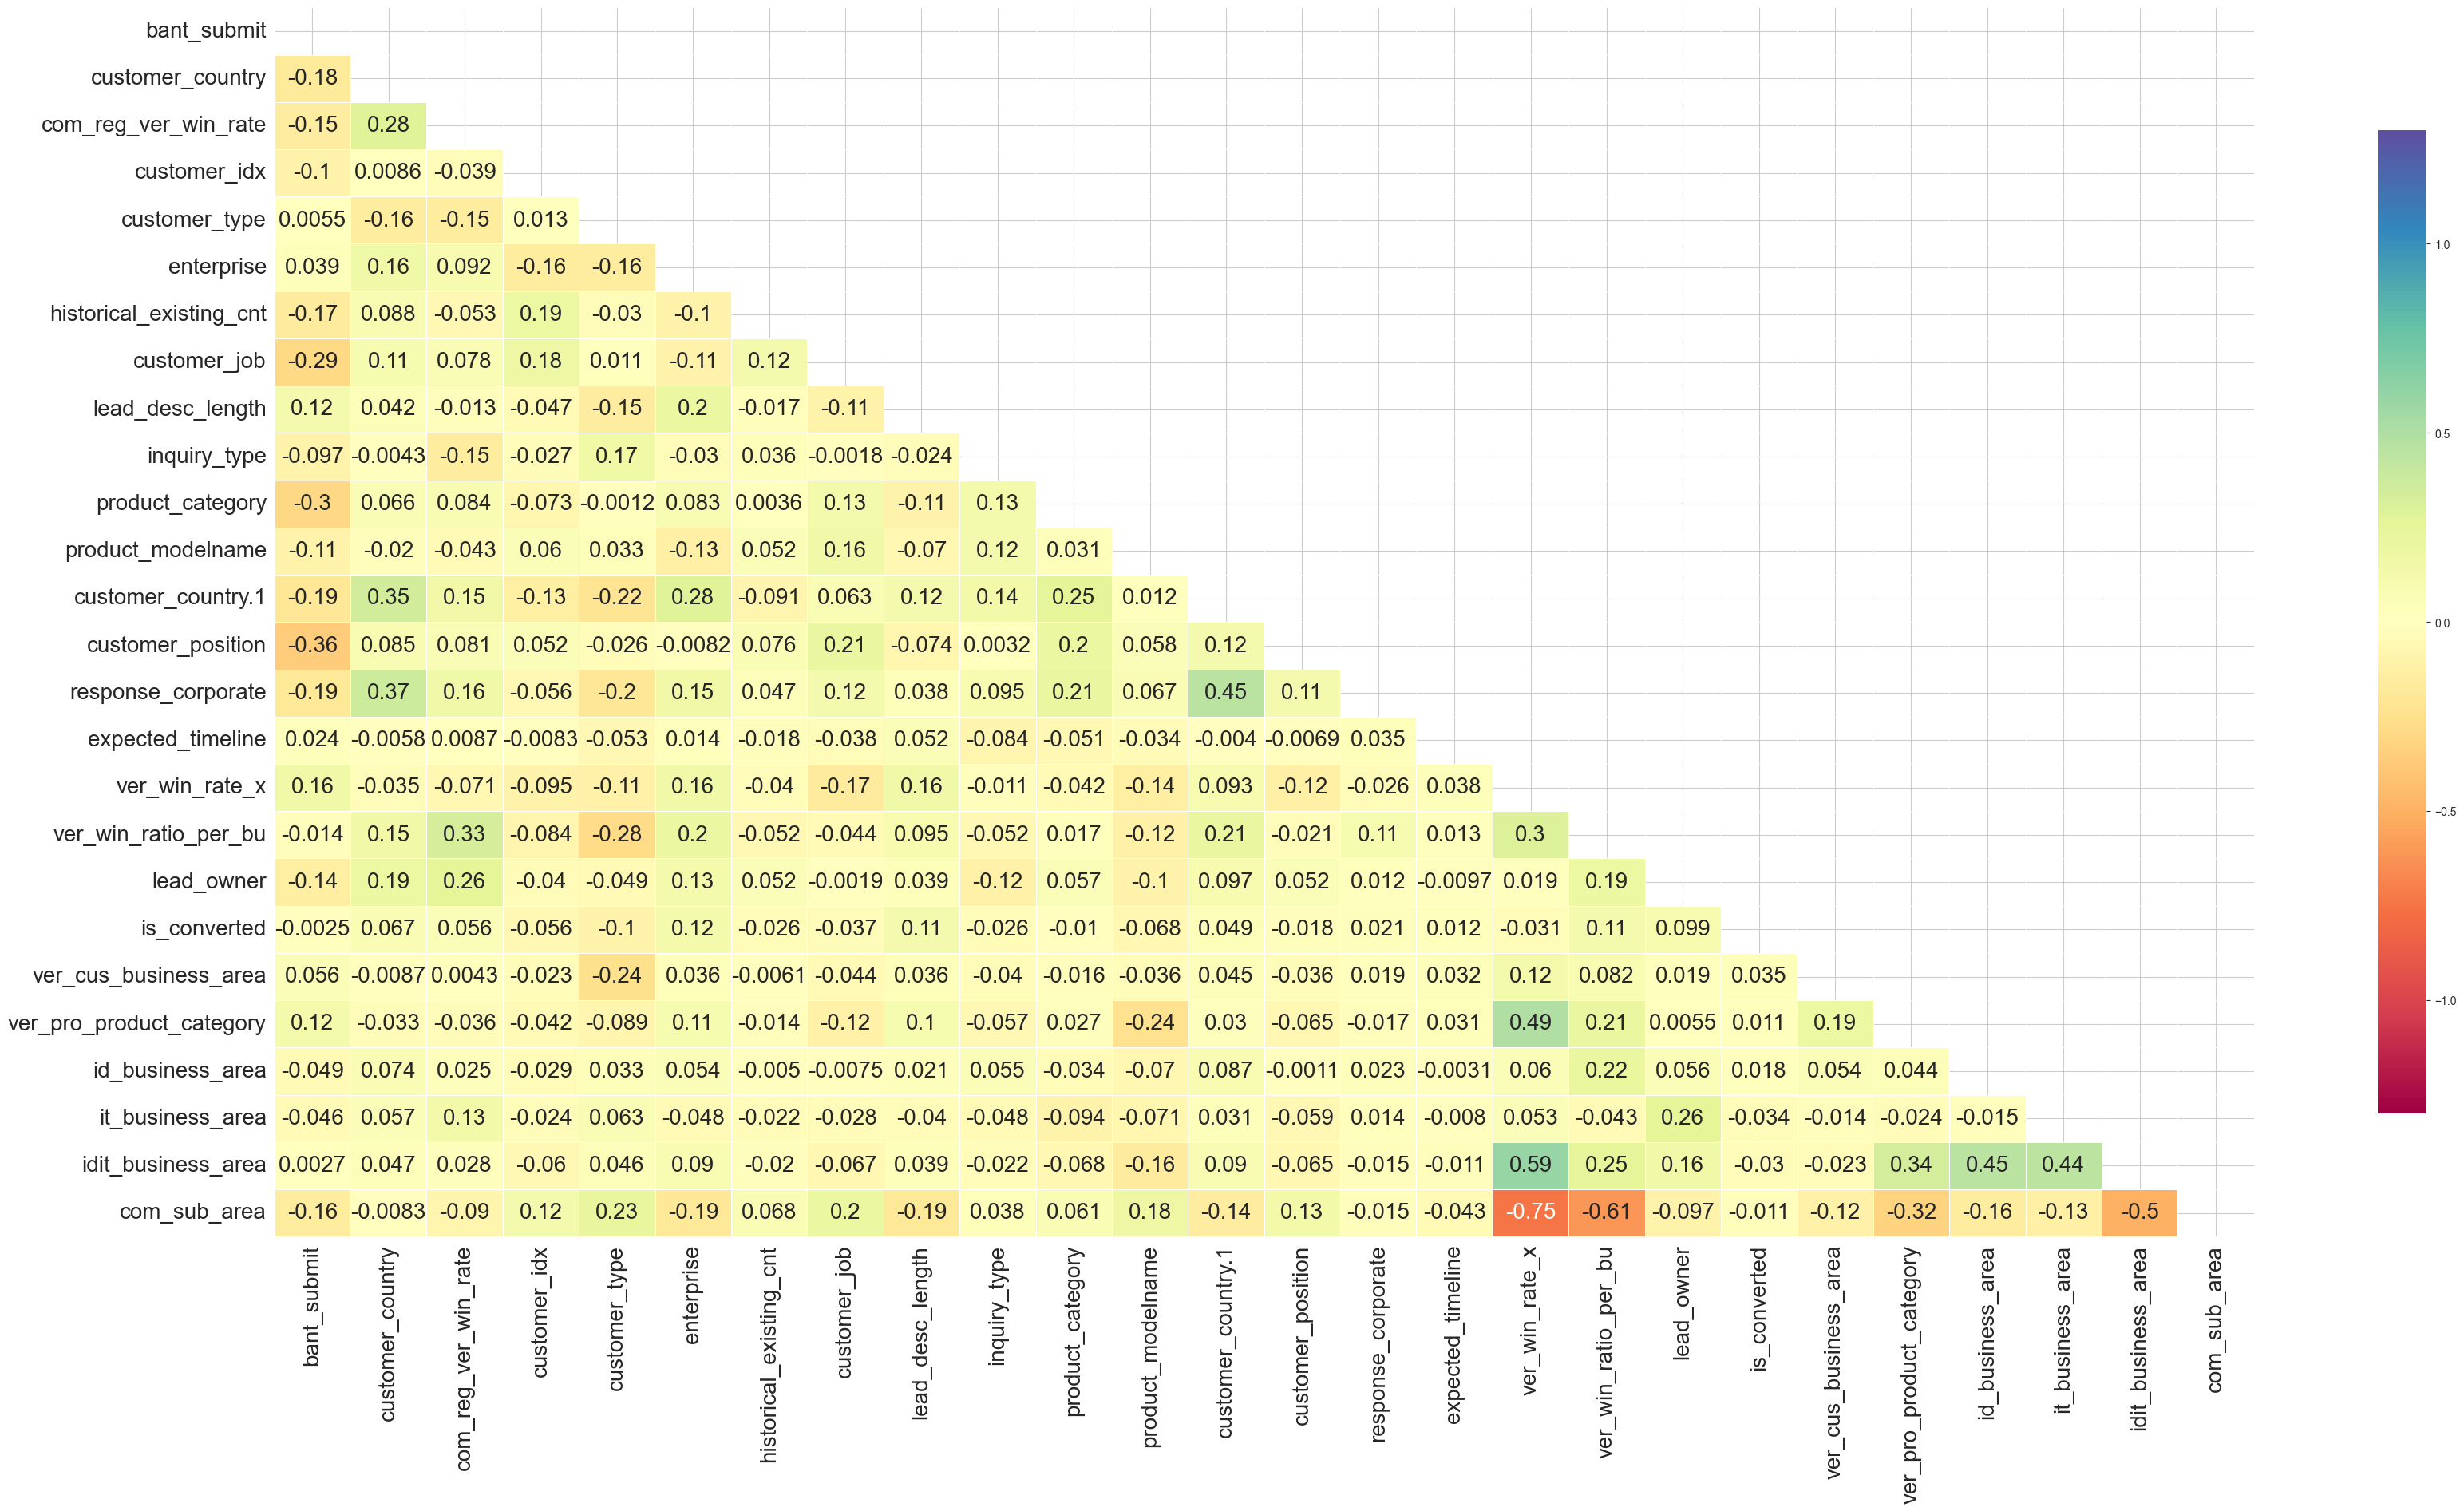

In [4449]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask, # 마스크 적용
            annot=True, # 수치(상관관계) 표시
            annot_kws = {'size':20}, # 수치표시 사이즈
            cmap='Spectral', # 색상 변경
            vmin=-1.3, # 색상 팔레트 범위
            vmax=1.3,
            linewidths=.5, # 히트맵의 선 스타일 변경
            cbar_kws={"shrink": .8}) # 히트맵 주변에 색상 바 추가(사이즈 조절 가능)

# 변수 이름의 크기 조절
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [4450]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     6.410056               bant_submit
1     5.448139          customer_country
2     1.861309      com_reg_ver_win_rate
3     4.706028              customer_idx
4    10.003590             customer_type
5     1.901274                enterprise
6     1.160712   historical_existing_cnt
7     5.609318              customer_job
8     1.506076          lead_desc_length
9    13.620102              inquiry_type
10    7.572162          product_category
11   21.080668         product_modelname
12    3.652262        customer_country.1
13    5.662857         customer_position
14    8.401482        response_corporate
15    7.405313         expected_timeline
16    4.585927            ver_win_rate_x
17    2.395714      ver_win_ratio_per_bu
18    2.795330                lead_owner
19    1.166492     ver_cus_business_area
20    1.575789  ver_pro_product_category
21    1.770096          id_business_area
22    1.870246          it_business_area
23    3.954373  

In [4451]:
df_train_encoded = df_train_encoded.drop(['com_sub_area'], axis=1)
df_test_encoded = df_test_encoded.drop(['com_sub_area'], axis=1)

In [4452]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     6.191911               bant_submit
1     5.366912          customer_country
2     1.856919      com_reg_ver_win_rate
3     4.638200              customer_idx
4     9.448107             customer_type
5     1.896806                enterprise
6     1.160685   historical_existing_cnt
7     5.479486              customer_job
8     1.504002          lead_desc_length
9    13.341814              inquiry_type
10    7.485522          product_category
11   19.189818         product_modelname
12    3.648760        customer_country.1
13    5.549237         customer_position
14    8.359622        response_corporate
15    7.259854         expected_timeline
16    2.943437            ver_win_rate_x
17    1.741522      ver_win_ratio_per_bu
18    2.760421                lead_owner
19    1.164502     ver_cus_business_area
20    1.528634  ver_pro_product_category
21    1.757664          id_business_area
22    1.808372          it_business_area
23    3.940895  

In [4453]:
df_train_encoded = df_train_encoded.drop(['product_modelname'], axis=1)
df_test_encoded = df_test_encoded.drop(['product_modelname'], axis=1)

In [4454]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     5.746340               bant_submit
1     5.360512          customer_country
2     1.855831      com_reg_ver_win_rate
3     4.536509              customer_idx
4     9.162144             customer_type
5     1.893659                enterprise
6     1.160237   historical_existing_cnt
7     5.251167              customer_job
8     1.503160          lead_desc_length
9    12.373402              inquiry_type
10    7.376761          product_category
11    3.648611        customer_country.1
12    5.432076         customer_position
13    8.205596        response_corporate
14    7.080680         expected_timeline
15    2.935575            ver_win_rate_x
16    1.741519      ver_win_ratio_per_bu
17    2.756999                lead_owner
18    1.161086     ver_cus_business_area
19    1.483974  ver_pro_product_category
20    1.755904          id_business_area
21    1.807911          it_business_area
22    3.938394        idit_business_area


In [4455]:
df_train_encoded = df_train_encoded.drop(['inquiry_type'], axis=1)
df_test_encoded = df_test_encoded.drop(['inquiry_type'], axis=1)

In [4456]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     5.518976               bant_submit
1     5.348296          customer_country
2     1.830738      com_reg_ver_win_rate
3     4.487732              customer_idx
4     7.883246             customer_type
5     1.893195                enterprise
6     1.156594   historical_existing_cnt
7     5.234699              customer_job
8     1.500644          lead_desc_length
9     7.037970          product_category
10    3.583368        customer_country.1
11    5.387364         customer_position
12    8.029432        response_corporate
13    7.042834         expected_timeline
14    2.921293            ver_win_rate_x
15    1.734749      ver_win_ratio_per_bu
16    2.753289                lead_owner
17    1.159300     ver_cus_business_area
18    1.478150  ver_pro_product_category
19    1.749553          id_business_area
20    1.806264          it_business_area
21    3.925534        idit_business_area


### 최종적으로 선정된 변수

In [4457]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bant_submit               59299 non-null  float64
 1   customer_country          59299 non-null  int32  
 2   com_reg_ver_win_rate      59299 non-null  float64
 3   customer_idx              59299 non-null  int64  
 4   customer_type             59299 non-null  int32  
 5   enterprise                59299 non-null  int32  
 6   historical_existing_cnt   59299 non-null  float64
 7   customer_job              59299 non-null  int32  
 8   lead_desc_length          59299 non-null  int64  
 9   product_category          59299 non-null  int32  
 10  customer_country.1        59299 non-null  int32  
 11  customer_position         59299 non-null  int32  
 12  response_corporate        59299 non-null  int32  
 13  expected_timeline         59299 non-null  int32  
 14  ver_wi

In [4458]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5271 non-null   int64  
 1   bant_submit               5271 non-null   float64
 2   customer_country          5271 non-null   int32  
 3   com_reg_ver_win_rate      5271 non-null   float64
 4   customer_idx              5271 non-null   int64  
 5   customer_type             5271 non-null   int32  
 6   enterprise                5271 non-null   int32  
 7   historical_existing_cnt   5271 non-null   float64
 8   customer_job              5271 non-null   int32  
 9   lead_desc_length          5271 non-null   int64  
 10  product_category          5271 non-null   int32  
 11  customer_country.1        5271 non-null   int32  
 12  customer_position         5271 non-null   int32  
 13  response_corporate        5271 non-null   int32  
 14  expected

### 2-2. 학습, 검증 데이터 분리

In [4459]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train_encoded.drop("is_converted", axis=1),
    df_train_encoded["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

단일모델 기준으로 사용할수 있는 모델들 라이브러리 불러오는 코드에 작성해둠

### 모델 라이브러리

In [4460]:
# 모델 라이브러리
## 단일모델로는 이와같은 모델정도 있으니깐 참고
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# 보팅
from sklearn.ensemble import VotingClassifier

# 스테킹
from sklearn.ensemble import StackingClassifier

### 최적 하이퍼 파라미터 찾기

optuna를 통한 최적의 파라미터 찾기

다시한번 optuna를 통한 최적의 파라미터 찾는과정

### 모델 정의

In [4461]:
### 단일 모델 ###

# LightGBM
model = LGBMClassifier(
    num_leaves=106
    , max_depth=19
    , n_estimators=409
    , learning_rate=0.06987263978834855
    , min_child_samples=27
    , verbose = -1
)


### 모델 학습

In [4462]:
model.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.06987263978834855, max_depth=19,
               min_child_samples=27, n_estimators=409, num_leaves=106,
               verbose=-1)

### 모델 성능 보기

In [4464]:
import pandas as pd

def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])
    micro_F1 = f1_score(y_test, y_pred, average='micro')  # 추가된 부분

    metrics = pd.DataFrame({
        '정확도': [accuracy],
        '정밀도': [precision],
        '재현율': [recall],
        'F1 Score': [F1],
        'Micro F1': [micro_F1]  # 추가된 부분
    })

    confusion_df = pd.DataFrame(confusion, index=['True', 'False'], columns=['True', 'False'])

    print("\n오차행렬:")
    display(confusion_df)
    print("평가 지표:")
    display(metrics)


In [4465]:
pred = model.predict(x_val)
get_clf_eval(y_val, pred)


오차행렬:


True  False
True    741    206
False    64  10849

평가 지표:


정확도       정밀도       재현율  F1 Score  Micro F1
0  0.977234  0.920497  0.782471   0.84589  0.977234

## 4. 제출하기

### 테스트 데이터 예측

In [4466]:
# 예측에 필요한 데이터 분리
x_test = df_test_encoded.drop(["is_converted", "id"], axis=1)

In [4467]:
test_pred = model.predict(x_test)
sum(test_pred) # True로 예측된 개수

444

### 제출 파일 작성

In [4468]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission_ver9.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**